In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
client_df = pd.read_csv("datasets/module_two_datasets/QVI_data.csv")

## Select control stores
The client has selected store numbers 77, 86 and 88 as trial stores and want control stores to be established
stores that are operational for the entire observation period.


We would want to match trial stores to control stores that are similar to the trial store prior to the trial period
of Feb 2019 in terms of :

* Monthly overall sales revenue
* Monthly number of customers
* Monthly number of transactions per customer

In [3]:
client_df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
# check for null values
client_df.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [5]:
# check datatypes
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [6]:
# change date column to datetime format
client_df['DATE'] = pd.to_datetime(client_df['DATE'])

In [7]:
client_df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [8]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


In [9]:
# check unique values for all features
client_df.nunique()

LYLTY_CARD_NBR       72636
DATE                   364
STORE_NBR              272
TXN_ID              263125
PROD_NBR               114
PROD_NAME              114
PROD_QTY                 5
TOT_SALES              111
PACK_SIZE               21
BRAND                   21
LIFESTAGE                7
PREMIUM_CUSTOMER         3
dtype: int64

Client wanted to select store numbers 77, 86 88 as trial stores and want control stores to be established stores that are operational for the entire
observation period.
We would want to match trial stores to control stores that are similar to the trial
store prior to the trial period of Feb 2019 in terms of :
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

In [10]:
# change datatypes first
client_df['DATE'] = client_df['DATE'].astype("str")

In [11]:
# add a new month ID column with the format yyyymm
yearmonth_values = []
for i in range(client_df.shape[0]):    
    # get the year data. covert to string for joining later
    client_year = client_df['DATE'][i].split("-")[0]
    # get the month data and convert to string for joining
    client_month = client_df['DATE'][i].split("-")[1]
    # add values together
    some_value = client_year+client_month
    # append to list
    yearmonth_values.append(some_value)

In [12]:
client_df['yearmonth'] = yearmonth_values
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
 12  yearmonth         264834 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 26.3+ MB


In [13]:
# convert month_id column to integer datatype
client_df['yearmonth'] = pd.to_numeric(client_df['yearmonth'])

In [14]:
# convert the date column back to datetime object
client_df['DATE'] = pd.to_datetime(client_df['DATE'])

In [15]:
# check if changes are made
client_df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,yearmonth
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,201812
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,201810
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,201810
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,201810


In [16]:
client_df.dtypes

LYLTY_CARD_NBR               int64
DATE                datetime64[ns]
STORE_NBR                    int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
PACK_SIZE                    int64
BRAND                       object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
yearmonth                    int64
dtype: object

In [17]:
# sort client_df by date from lowest to highest
client_df = client_df.sort_values(by='DATE').reset_index(drop=True)

 For each store and month calculate total sales, number of customers,
transactions per customer, chips per customer and the average price per unit.

In [18]:
# total sales per store per date
total_sales = client_df.groupby(by=['STORE_NBR','yearmonth']).sum()['TOT_SALES']
total_sales

STORE_NBR  yearmonth
1          201807       206.9
           201808       176.1
           201809       278.8
           201810       188.1
           201811       192.6
                        ...  
272        201902       395.5
           201903       442.3
           201904       445.1
           201905       314.6
           201906       312.1
Name: TOT_SALES, Length: 3169, dtype: float64

In [19]:
# get the number of transactions
transactions = client_df.groupby(by=['STORE_NBR','yearmonth']).count()['LYLTY_CARD_NBR']
transactions

STORE_NBR  yearmonth
1          201807       52
           201808       43
           201809       62
           201810       45
           201811       47
                        ..
272        201902       48
           201903       53
           201904       56
           201905       40
           201906       37
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64

In [20]:
# get the number of customers
unique_customers = client_df.groupby(by=['STORE_NBR','yearmonth']).nunique()['LYLTY_CARD_NBR']
unique_customers

STORE_NBR  yearmonth
1          201807       49
           201808       42
           201809       59
           201810       44
           201811       46
                        ..
272        201902       45
           201903       50
           201904       54
           201905       34
           201906       34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64

In [21]:
# get the number of transactions PER customer
transactions_per_customer = transactions / unique_customers
transactions_per_customer

STORE_NBR  yearmonth
1          201807       1.061224
           201808       1.023810
           201809       1.050847
           201810       1.022727
           201811       1.021739
                          ...   
272        201902       1.066667
           201903       1.060000
           201904       1.037037
           201905       1.176471
           201906       1.088235
Name: LYLTY_CARD_NBR, Length: 3169, dtype: float64

In [22]:
# get the number of chips purchased
chips_purchased = client_df.groupby(by=['STORE_NBR','yearmonth']).sum()['PROD_QTY']
chips_purchased

STORE_NBR  yearmonth
1          201807        62
           201808        54
           201809        75
           201810        58
           201811        57
                       ... 
272        201902        91
           201903       101
           201904       105
           201905        71
           201906        70
Name: PROD_QTY, Length: 3169, dtype: int64

In [23]:
# get chips PER customer
chips_per_customer = chips_purchased / unique_customers
chips_per_customer

STORE_NBR  yearmonth
1          201807       1.265306
           201808       1.285714
           201809       1.271186
           201810       1.318182
           201811       1.239130
                          ...   
272        201902       2.022222
           201903       2.020000
           201904       1.944444
           201905       2.088235
           201906       2.058824
Length: 3169, dtype: float64

In [24]:
# get chips PER transaction
chips_per_transaction = chips_purchased / transactions
chips_per_transaction

STORE_NBR  yearmonth
1          201807       1.192308
           201808       1.255814
           201809       1.209677
           201810       1.288889
           201811       1.212766
                          ...   
272        201902       1.895833
           201903       1.905660
           201904       1.875000
           201905       1.775000
           201906       1.891892
Length: 3169, dtype: float64

In [25]:
# get the average price per unit
price_per_unit = total_sales / chips_purchased
price_per_unit

STORE_NBR  yearmonth
1          201807       3.337097
           201808       3.261111
           201809       3.717333
           201810       3.243103
           201811       3.378947
                          ...   
272        201902       4.346154
           201903       4.379208
           201904       4.239048
           201905       4.430986
           201906       4.458571
Length: 3169, dtype: float64

In [26]:
# concatenate total sales, num_customers, transactions/customer, chips/customer, and average price per unit
items_tojoin = [total_sales, \
                unique_customers, \
                transactions_per_customer, \
#                 chips_per_customer,\
                chips_per_transaction, \
                price_per_unit]
# concatenate and store in a variable
measureOverTime_df = pd.concat(items_tojoin, axis=1)

In [27]:
measureOverTime_df.columns.values

array(['TOT_SALES', 'LYLTY_CARD_NBR', 'LYLTY_CARD_NBR', 0, 1],
      dtype=object)

In [28]:
# rename columms
new_names = ["totSales", 'nCustomers','nTxnPerCust','nChipsPerTxn','avgPricePerUnit']

measureOverTime_df.columns = new_names

In [29]:
# check if changes are made
measureOverTime_df.head()

totSales  nCustomers  nTxnPerCust  nChipsPerTxn  \
STORE_NBR yearmonth                                                    
1         201807        206.9          49     1.061224      1.192308   
          201808        176.1          42     1.023810      1.255814   
          201809        278.8          59     1.050847      1.209677   
          201810        188.1          44     1.022727      1.288889   
          201811        192.6          46     1.021739      1.212766   

                     avgPricePerUnit  
STORE_NBR yearmonth                   
1         201807            3.337097  
          201808            3.261111  
          201809            3.717333  
          201810            3.243103  
          201811            3.378947

In [30]:
measureOverTime_df.reset_index(inplace=True)

In [31]:
measureOverTime_df.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [32]:
## find the stores with full observation (store with all dates)

# first find how many oberservations there are in total:
client_df['yearmonth'].nunique()

12

In [33]:
# stores that don't have 12 unique "yearmonth" values don't have full observations
store_yearmonth = pd.DataFrame(measureOverTime_df.groupby(by='STORE_NBR').nunique()['yearmonth'])
store_yearmonth.loc[store_yearmonth['yearmonth'] != 12]

,yearmonth
STORE_NBR,
11,2
31,2
44,11
76,1
85,1
92,1
117,11
193,3
206,2


In [34]:
# find stores that don't have 12 obervations
store_missingValues = store_yearmonth.loc[store_yearmonth['yearmonth'] != 12].index.values

In [35]:
store_missingValues

array([ 11,  31,  44,  76,  85,  92, 117, 193, 206, 211, 218, 252],
      dtype=int64)

In [560]:
print(measureOverTime_df['yearmonth'].min())
measureOverTime_df['yearmonth'].max()

201807


201906

In [36]:
measureOverTime_df.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [37]:
# drop stores by only selecting stores that have full observations
storesWithFullObs = measureOverTime_df.loc[~measureOverTime_df['STORE_NBR'].isin(store_missingValues)]


In [38]:
print(storesWithFullObs.shape)
storesWithFullObs.head()

(3120, 7)


,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [40]:
# filter the pre-trial period (before february of 2019)
preTrialMeasures = storesWithFullObs.loc[storesWithFullObs['yearmonth'] < 201902]
preTrialMeasures.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [562]:
# save file as html
preTrialMeasures.to_html("html_formatted_dataframes/module_two_files/preTrialMeasures.html", index=False)

Create a functions that calculates the <b>correlation</b> between trial store and other stores based on a single metric

In [41]:
client_df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,yearmonth
0,104039,2018-07-01,104,103937,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165,RRD,OLDER SINGLES/COUPLES,Premium,201807
1,118107,2018-07-01,118,121300,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,COBS,RETIREES,Mainstream,201807
2,226024,2018-07-01,226,226348,114,Kettle Sensations Siracha Lime 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,201807
3,152040,2018-07-01,152,150459,25,Pringles SourCream Onion 134g,2,7.4,134,PRINGLES,YOUNG FAMILIES,Mainstream,201807
4,33140,2018-07-01,33,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream,201807


In [92]:
# create a functions that calculates the correlation between trial store and other stores based on a single metric
test_df = pd.DataFrame(preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 1,'totSales'])
pd.DataFrame(preTrialMeasures.loc[preTrialMeasures['STORE_NBR'] == 77,"totSales"]).reset_index(drop=True).corrwith(test_df,axis=0).values[0]

0.07521784241886638

In [124]:
# create a functions that calculates the correlation between trial store and other stores based on a single metric
def findCorrelation(pre_trial_store, trial_store_num, measuring_metric):
    # create empty dataframe with column names to store values later
    some_dataframe = pd.DataFrame(columns =
                                 ['trial_store',"other_stores","measure","correlation"])
    
    # define number of stores for looping
    number_of_stores = pre_trial_store['STORE_NBR'].unique()
    
    for i in number_of_stores:
        
        # create a dataframe for the store used for comparison with just the measuring metrics column
        df_forTrial = pd.DataFrame(pre_trial_store.loc[pre_trial_store['STORE_NBR'] == i, measuring_metric]).reset_index(drop=True)
        
        # Create a dataframe for the pre-trial store with the measuring metrics column
        measuring_df = pd.DataFrame(pre_trial_store.\
                                    loc[pre_trial_store['STORE_NBR']==trial_store_num, \
                                        measuring_metric]).reset_index(drop=True)
        
        # Find correlation between two columns of data
        correlation_val = measuring_df.corrwith(df_forTrial, axis=0).values[0]
        
        # append the calculated values into a dataframe
        some_dataframe = some_dataframe.append({
            "trial_store": trial_store_num,
            "other_stores": i,
            "measure": measuring_metric,
            "correlation": correlation_val            
        }, ignore_index=True)
        
    # return the dataframe created in this function
    return some_dataframe

In [133]:
# try store number 4
corr_nSales = findCorrelation(preTrialMeasures, 4, "totSales")
corr_nSales

,trial_store,other_stores,measure,correlation
0,4,1,totSales,-0.513184
1,4,2,totSales,0.128407
2,4,3,totSales,0.227754
3,4,4,totSales,1.000000
4,4,5,totSales,-0.118735
...,...,...,...,...
255,4,268,totSales,-0.282850
256,4,269,totSales,0.463409
257,4,270,totSales,0.255360
258,4,271,totSales,0.318078


Apart from correlation, calculate a standardized metric based on the absolute difference bewteen the trial store's performance and each control store's performance. 

In [131]:
# find magnitude difference
def findDifference(pre_trial_store, trial_store_num, measuring_metric):
    # create empty dataframe
    some_dataframe = pd.DataFrame(columns =
                                 ['trial_store',"other_stores","measure","difference"])
    
    # define number of stores for looping
    number_of_stores = pre_trial_store['STORE_NBR'].unique()
    
    for i in number_of_stores:
        df_forTrial = pd.DataFrame(pre_trial_store.loc[pre_trial_store['STORE_NBR'] == i, measuring_metric]).reset_index(drop=True)
        measuring_df = pd.DataFrame(pre_trial_store.\
                                    loc[pre_trial_store['STORE_NBR']==trial_store_num, \
                                        measuring_metric]).reset_index(drop=True)
        # calculate absolute difference (this outputs a dataframe with total sales for all yearmonths for each store)
        
        abs_difference = abs(measuring_df - df_forTrial)
        
        # standardize the magnitude distance so the measure ranges from 0 to 1
        ######################
        abs_max = abs_difference.max()
        abs_min = abs_difference.min()
        
        mag_difference = np.mean(1 - (abs_difference-abs_min) / 
                                (abs_max - abs_min))
        ######################
        
        # add calculated values into the dataframe
        some_dataframe = some_dataframe.append({
            "trial_store": trial_store_num,
            "other_stores": i,
            "measure": measuring_metric,
            "difference": mag_difference.values[0]          
        }, ignore_index=True)
        

    return some_dataframe

In [134]:
# calculate correlation against store 77 using total sales and number of customers

In [135]:
preTrialMeasures.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [566]:
# correlation for total sales and number of customers
corr_nSales = findCorrelation(preTrialMeasures, 77, "totSales")
corr_nCustomers = findCorrelation(preTrialMeasures, 77, "nCustomers")

In [567]:
corr_nSales

,trial_store,other_stores,measure,correlation
0,77,1,totSales,0.075218
1,77,2,totSales,-0.263079
2,77,3,totSales,0.806644
3,77,4,totSales,-0.263300
4,77,5,totSales,-0.110652
...,...,...,...,...
255,77,268,totSales,0.344757
256,77,269,totSales,-0.315730
257,77,270,totSales,0.315430
258,77,271,totSales,0.355487


In [568]:
corr_nCustomers

,trial_store,other_stores,measure,correlation
0,77,1,nCustomers,0.322168
1,77,2,nCustomers,-0.572051
2,77,3,nCustomers,0.834207
3,77,4,nCustomers,-0.295639
4,77,5,nCustomers,0.370659
...,...,...,...,...
255,77,268,nCustomers,0.369517
256,77,269,nCustomers,-0.474293
257,77,270,nCustomers,-0.131259
258,77,271,nCustomers,0.019629


In [569]:
# magnitude for total sales and number of customers
mag_nSales = findDifference(preTrialMeasures, 77, 'totSales')
mag_nCustomers = findDifference(preTrialMeasures, 77, "nCustomers")

In [570]:
mag_nSales

,trial_store,other_stores,measure,difference
0,77,1,totSales,0.408163
1,77,2,totSales,0.590119
2,77,3,totSales,0.522914
3,77,4,totSales,0.644934
4,77,5,totSales,0.516320
...,...,...,...,...
255,77,268,totSales,0.429787
256,77,269,totSales,0.559099
257,77,270,totSales,0.591547
258,77,271,totSales,0.341091


In [571]:
mag_nCustomers

,trial_store,other_stores,measure,difference
0,77,1,nCustomers,0.663866
1,77,2,nCustomers,0.471429
2,77,3,nCustomers,0.489796
3,77,4,nCustomers,0.498258
4,77,5,nCustomers,0.512605
...,...,...,...,...
255,77,268,nCustomers,0.571429
256,77,269,nCustomers,0.484472
257,77,270,nCustomers,0.536680
258,77,271,nCustomers,0.328571


In [572]:
# merge the dataframes with their respective measure metrics
corrMag_sales_df = pd.merge(corr_nSales, mag_nSales, how='inner')
corrMag_customers_df = pd.merge(corr_nCustomers, mag_nCustomers, how='inner')
corrMag_sales_df

,trial_store,other_stores,measure,correlation,difference
0,77,1,totSales,0.075218,0.408163
1,77,2,totSales,-0.263079,0.590119
2,77,3,totSales,0.806644,0.522914
3,77,4,totSales,-0.263300,0.644934
4,77,5,totSales,-0.110652,0.516320
...,...,...,...,...,...
255,77,268,totSales,0.344757,0.429787
256,77,269,totSales,-0.315730,0.559099
257,77,270,totSales,0.315430,0.591547
258,77,271,totSales,0.355487,0.341091


In [573]:
corrMag_customers_df

,trial_store,other_stores,measure,correlation,difference
0,77,1,nCustomers,0.322168,0.663866
1,77,2,nCustomers,-0.572051,0.471429
2,77,3,nCustomers,0.834207,0.489796
3,77,4,nCustomers,-0.295639,0.498258
4,77,5,nCustomers,0.370659,0.512605
...,...,...,...,...,...
255,77,268,nCustomers,0.369517,0.571429
256,77,269,nCustomers,-0.474293,0.484472
257,77,270,nCustomers,-0.131259,0.536680
258,77,271,nCustomers,0.019629,0.328571


In [574]:
# calculate weighted average of each row using correlation and difference
# use 50% weighting for now assuming the two variables are equally important
corr_weight = 0.5
# for the sales dataframe
corrMag_sales_df['corrMagAVG_sales'] = corr_weight * corrMag_sales_df['correlation'] + \
                                    corr_weight * corrMag_sales_df['difference']
# for the customers dataframe
corrMag_customers_df['corrMagAVG_customers'] = corr_weight * corrMag_customers_df['correlation'] + \
                                        corr_weight * corrMag_customers_df['difference']



In [575]:
print("corrMag_sales_df")
display(corrMag_sales_df.head())
print("corrMag_customers_df")
corrMag_customers_df.head()

corrMag_sales_df


,trial_store,other_stores,measure,correlation,difference,corrMagAVG_sales
0,77,1,totSales,0.075218,0.408163,0.241691
1,77,2,totSales,-0.263079,0.590119,0.163520
2,77,3,totSales,0.806644,0.522914,0.664779
3,77,4,totSales,-0.263300,0.644934,0.190817
4,77,5,totSales,-0.110652,0.516320,0.202834


corrMag_customers_df


,trial_store,other_stores,measure,correlation,difference,corrMagAVG_customers
0,77,1,nCustomers,0.322168,0.663866,0.493017
1,77,2,nCustomers,-0.572051,0.471429,-0.050311
2,77,3,nCustomers,0.834207,0.489796,0.662002
3,77,4,nCustomers,-0.295639,0.498258,0.101310
4,77,5,nCustomers,0.370659,0.512605,0.441632


In [576]:
corrMag_customers_df.loc[corrMag_customers_df['other_stores']==77]

,trial_store,other_stores,measure,correlation,difference,corrMagAVG_customers
72,77,77,nCustomers,1.0,NaN,NaN


In [577]:
sum(corrMag_sales_df.index == corrMag_customers_df.index) == len(corrMag_sales_df)

True

In [578]:
# merge into one dataframe with just the corrMagAVG column
# pd.merge(corrMag_sales_df.reset_index(), corrMag_customers_df.reset_index(), how='inner')
control_store_df = pd.concat([corrMag_sales_df, corrMag_customers_df], axis=1)[['trial_store', 'other_stores','corrMagAVG_sales', "corrMagAVG_customers"]]
control_store_df.head()

,trial_store,trial_store,other_stores,other_stores,corrMagAVG_sales,corrMagAVG_customers
0,77,77,1,1,0.241691,0.493017
1,77,77,2,2,0.163520,-0.050311
2,77,77,3,3,0.664779,0.662002
3,77,77,4,4,0.190817,0.101310
4,77,77,5,5,0.202834,0.441632


In [579]:
# remove duplicate columns
control_store_df = control_store_df.loc[:,~control_store_df.columns.duplicated()]
# check if changes are made
control_store_df

,trial_store,other_stores,corrMagAVG_sales,corrMagAVG_customers
0,77,1,0.241691,0.493017
1,77,2,0.163520,-0.050311
2,77,3,0.664779,0.662002
3,77,4,0.190817,0.101310
4,77,5,0.202834,0.441632
...,...,...,...,...
255,77,268,0.387272,0.470473
256,77,269,0.121684,0.005090
257,77,270,0.453489,0.202710
258,77,271,0.348289,0.174100


store with the highest corrMagAVG score will be selected as the control store since it is the most similar to the trial store.

In [580]:
# define a column for the final control score
control_store_df['control_score'] = 0.5 * (control_store_df['corrMagAVG_sales'] + control_store_df['corrMagAVG_customers'])

In [581]:
control_store_df.head()

,trial_store,other_stores,corrMagAVG_sales,corrMagAVG_customers,control_score
0,77,1,0.241691,0.493017,0.367354
1,77,2,0.163520,-0.050311,0.056604
2,77,3,0.664779,0.662002,0.663390
3,77,4,0.190817,0.101310,0.146064
4,77,5,0.202834,0.441632,0.322233


In [582]:
# select control stores based on the highest matching store (close to 1 but not the store itself)
control_store_df.sort_values(by='control_score',ascending=False)


,trial_store,other_stores,corrMagAVG_sales,corrMagAVG_customers,control_score
221,77,233,0.697290,0.816607,0.756949
67,77,71,0.789497,0.663123,0.726310
79,77,84,0.656972,0.715000,0.685986
111,77,119,0.636046,0.729729,0.682887
108,77,115,0.708347,0.645155,0.676751
...,...,...,...,...,...
230,77,242,-0.121818,-0.046675,-0.084247
178,77,186,-0.128806,-0.057268,-0.093037
95,77,102,-0.102238,-0.119121,-0.110680
8,77,9,-0.144121,-0.087135,-0.115628


From this chart, we can see that store 233 matches trial store 77 the most. 


In [583]:
# create a checkpoint for preTrialMeasures
store_data_df = preTrialMeasures.reset_index(drop=True)
store_data_df.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [584]:
# set control store as store 233
ctrl_store = 233
# set trial store as 77
trial_store = 77

In [585]:
# add a column labelling whether the store is "other stores",'control store', or 'trial store'
# create empty_list to store numbers
store_label = []
for i in range(store_data_df.shape[0]):
    if store_data_df['STORE_NBR'][i] == trial_store:
        store_label.append("trial_store")
    elif store_data_df['STORE_NBR'][i] == ctrl_store:
        store_label.append("control_store")
    else:
        store_label.append("other_stores")

store_data_df['store_type'] = store_label
    

In [586]:
store_data_df.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,store_type
0,1,201807,206.9,49,1.061224,1.192308,3.337097,other_stores
1,1,201808,176.1,42,1.023810,1.255814,3.261111,other_stores
2,1,201809,278.8,59,1.050847,1.209677,3.717333,other_stores
3,1,201810,188.1,44,1.022727,1.288889,3.243103,other_stores
4,1,201811,192.6,46,1.021739,1.212766,3.378947,other_stores


In [587]:
store_data_df['store_type'].unique()

array(['other_stores', 'trial_store', 'control_store'], dtype=object)

In [588]:
# check if function was correct
store_data_df.loc[(store_data_df['store_type'] == "trial_store") | \
                 (store_data_df['store_type'] == "control_store")]

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,store_type
504,77,201807,296.8,51,1.078431,1.527273,3.533333,trial_store
505,77,201808,255.5,47,1.021277,1.541667,3.452703,trial_store
506,77,201809,225.2,42,1.047619,1.590909,3.217143,trial_store
507,77,201810,204.5,37,1.027027,1.368421,3.932692,trial_store
508,77,201811,245.3,41,1.073171,1.522727,3.661194,trial_store
509,77,201812,267.3,46,1.065217,1.469388,3.712500,trial_store
510,77,201901,204.4,35,1.114286,1.666667,3.144615,trial_store
1547,233,201807,290.7,51,1.058824,1.629630,3.303409,control_store
1548,233,201808,285.9,48,1.041667,1.600000,3.573750,control_store
1549,233,201809,228.6,42,1.071429,1.555556,3.265714,control_store


In [589]:
# run if needed
if "transaction_month" in store_data_df.columns.values:
    store_data_df.drop(columns='transaction_month', inplace=True)

In [590]:
# create a transaction month column for graphing later
date_data = pd.to_datetime(store_data_df['yearmonth'], format = '%Y%m')

# insert in the third index of the column beside yearmonth
store_data_df.insert(2, "transaction_month", date_data)

In [591]:
store_data_df.head()

,STORE_NBR,yearmonth,transaction_month,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,store_type
0,1,201807,2018-07-01,206.9,49,1.061224,1.192308,3.337097,other_stores
1,1,201808,2018-08-01,176.1,42,1.023810,1.255814,3.261111,other_stores
2,1,201809,2018-09-01,278.8,59,1.050847,1.209677,3.717333,other_stores
3,1,201810,2018-10-01,188.1,44,1.022727,1.288889,3.243103,other_stores
4,1,201811,2018-11-01,192.6,46,1.021739,1.212766,3.378947,other_stores


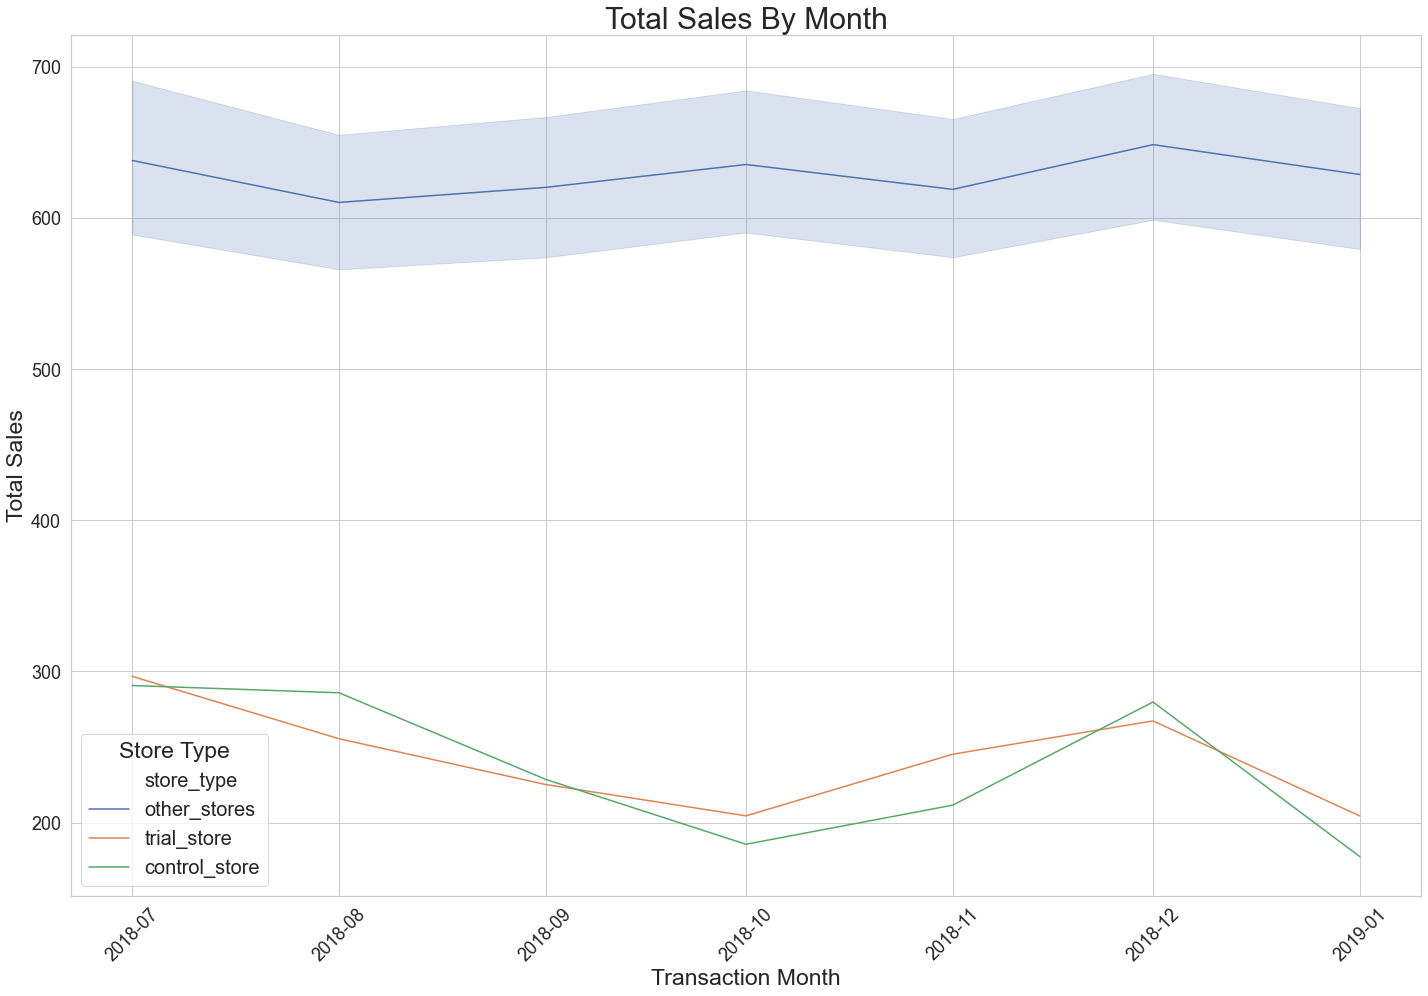

In [592]:
# visually check if drivers are indeed similar in the period before the trial
sns.set(style='whitegrid')
# set figure size
plt.figure(figsize=(20,14))

# create line chart
sns.lineplot(x = "transaction_month",
            y = "totSales",
            hue = "store_type",
            data = store_data_df)

# set x label orientation
plt.xticks(rotation=45)

# set fontsize
plt.xlabel("Transaction Month", fontsize=23)
plt.ylabel("Total Sales", fontsize=23)
plt.title("total sales by month".title(), fontsize=30)
plt.tick_params(labelsize=18)

# set legend location and fontsize
plt.legend(title = "store type".title(),
          loc='best',
          fontsize=20,
          title_fontsize=23)

# fit the graph
plt.tight_layout()

# save file
plt.savefig("static/module2_analysis_pics/trial_control_salesPerMonth.png")

In [593]:
store_data_df.head(3)

,STORE_NBR,yearmonth,transaction_month,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,store_type
0,1,201807,2018-07-01,206.9,49,1.061224,1.192308,3.337097,other_stores
1,1,201808,2018-08-01,176.1,42,1.023810,1.255814,3.261111,other_stores
2,1,201809,2018-09-01,278.8,59,1.050847,1.209677,3.717333,other_stores


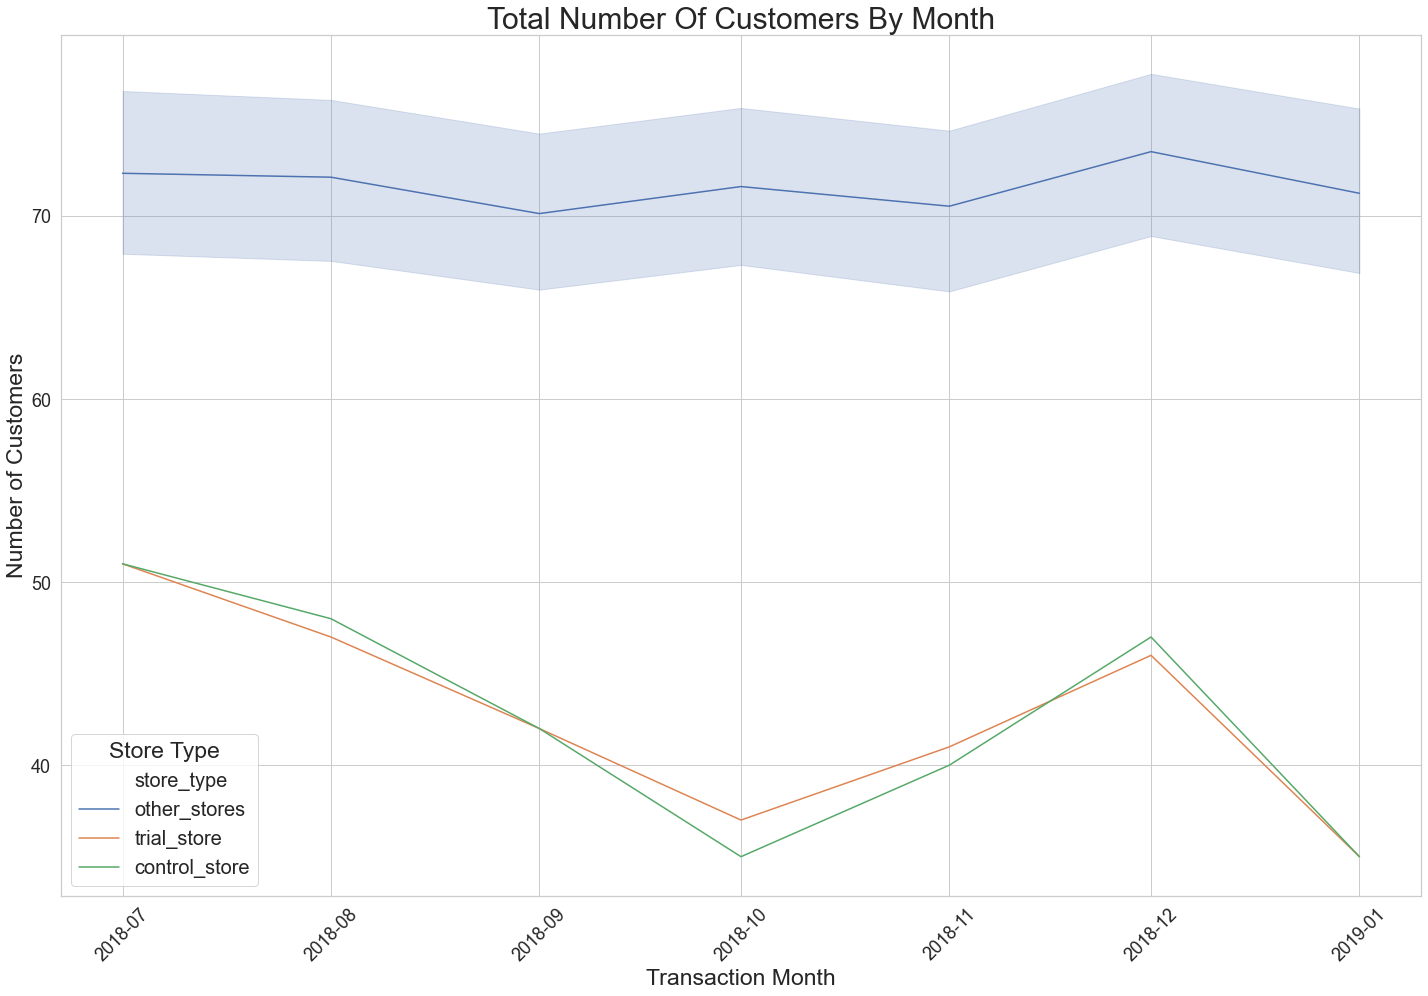

In [594]:
# this time graph the customers data
sns.set(style='whitegrid')
# set figure size
plt.figure(figsize=(20,14))

# create line chart
sns.lineplot(x = "transaction_month",
            y = "nCustomers",
            hue = "store_type",
            data = store_data_df)

# set x label orientation
plt.xticks(rotation=45)

# set fontsize
plt.xlabel("Transaction Month", fontsize=23)
plt.ylabel("Number of Customers", fontsize=23)
plt.title("total number of customers by month".title(), fontsize=30)
plt.tick_params(labelsize=18)

# set legend location and fontsize
plt.legend(title = "store type".title(),
          loc='best',
          fontsize=20,
          title_fontsize=23)

# fit the graph
plt.tight_layout()

# save file
plt.savefig("static/module2_analysis_pics/trial_control_customersPerMonth.png")


## Assement of Trial for trial store 77
The trial period starts from february 2019 to the end of April 2019 and now we check to see if there has been an uplift in overall chip sales

In [595]:
print(trial_store)
print(ctrl_store)

77
233


In [596]:
# scale pre_trial control sales to match pre-trial trial store sales

# trial store total sales
trial_totSales = store_data_df.loc[store_data_df['STORE_NBR'] == trial_store,'totSales'].sum()

# control store total sales
ctrl_totSales = store_data_df.loc[store_data_df['STORE_NBR'] == ctrl_store, 'totSales'].sum()

# scale numbers 
scalingFactorForControlSales = trial_totSales / ctrl_totSales
scalingFactorForControlSales

1.0236173032895528

In [597]:
measureOverTime_df.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,transaction_month
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [598]:
# apply the scaling factor

scaled_control_stores = measureOverTime_df.loc[measureOverTime_df['STORE_NBR'] == ctrl_store]
scaled_control_stores

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,transaction_month
2699,233,201807,290.7,51,1.058824,1.629630,3.303409,2018-07-01
2700,233,201808,285.9,48,1.041667,1.600000,3.573750,2018-08-01
2701,233,201809,228.6,42,1.071429,1.555556,3.265714,2018-09-01
2702,233,201810,185.7,35,1.028571,1.555556,3.316071,2018-10-01
2703,233,201811,211.6,40,1.025000,1.512195,3.412903,2018-11-01
2704,233,201812,279.8,47,1.063830,1.500000,3.730667,2018-12-01
2705,233,201901,177.5,35,1.000000,1.342857,3.776596,2019-01-01
2706,233,201902,244.0,45,1.044444,1.489362,3.485714,2019-02-01
2707,233,201903,199.1,40,1.025000,1.439024,3.374576,2019-03-01
2708,233,201904,158.6,30,1.100000,1.393939,3.447826,2019-04-01


In [599]:
# reorder columns
scaled_control_stores = scaled_control_stores[['STORE_NBR', 'yearmonth', 'nCustomers', 'nTxnPerCust',
       'nChipsPerTxn', 'avgPricePerUnit', 'totSales']]


In [600]:
scaled_control_stores['control_sales'] = scaled_control_stores['totSales'] * scalingFactorForControlSales

In [601]:
scaled_control_stores.head()

,STORE_NBR,yearmonth,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,totSales,control_sales
2699,233,201807,51,1.058824,1.629630,3.303409,290.7,297.565550
2700,233,201808,48,1.041667,1.600000,3.573750,285.9,292.652187
2701,233,201809,42,1.071429,1.555556,3.265714,228.6,233.998916
2702,233,201810,35,1.028571,1.555556,3.316071,185.7,190.085733
2703,233,201811,40,1.025000,1.512195,3.412903,211.6,216.597421


In [602]:
## create a percentagedifference dataframe

# calcualte total sales for the trials data
trial_sales = measureOverTime_df.loc[measureOverTime_df['STORE_NBR'] == trial_store, 'totSales']

# build the dataframe for analysis later
percentage_difference_df = scaled_control_stores[['yearmonth', 'control_sales']]
percentage_difference_df['trial_sales'] = trial_sales.values
percentage_difference_df

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,yearmonth,control_sales,trial_sales
2699,201807,297.565550,296.8
2700,201808,292.652187,255.5
2701,201809,233.998916,225.2
2702,201810,190.085733,204.5
2703,201811,216.597421,245.3
2704,201812,286.408121,267.3
2705,201901,181.692071,204.4
2706,201902,249.762622,235.0
2707,201903,203.802205,278.5
2708,201904,162.345704,263.5


In [603]:
## calculate percentage difference

# select control_sales
control2_sales = percentage_difference_df['control_sales']

# select trial sales
trial2_sales = percentage_difference_df['trial_sales']

# store calculated value in a new column
percentage_difference_df['percentage_diff'] = abs(control2_sales - trial2_sales) / control2_sales


C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [604]:
percentage_difference_df.reset_index(drop=True, inplace=True)

In [605]:
percentage_difference_df

,yearmonth,control_sales,trial_sales,percentage_diff
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516
5,201812,286.408121,267.3,0.066716
6,201901,181.692071,204.4,0.124980
7,201902,249.762622,235.0,0.059107
8,201903,203.802205,278.5,0.366521
9,201904,162.345704,263.5,0.623080


the null hypothesis is that the trial period is the same as the pre-trial period, so i will verify this by checking to see if the difference is significant

In [606]:
from scipy.stats import ttest_ind

In [607]:
import scipy.stats

In [608]:
## take the standard deviation based on the scaled percentage difference in the pre-trial period
perDiff_preTrial = percentage_difference_df.loc[percentage_difference_df['yearmonth'] < 201902, 'percentage_diff']
stdDev = perDiff_preTrial.std()
stdDev

0.04994076264142549

In [609]:
# test with null hypothesis of there being 0 difference between trial and control stores
percentage_difference_df['tValues'] = (percentage_difference_df['percentage_diff'] - 0) / stdDev


C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [610]:
# select the trial period
percentage_difference_df.loc[percentage_difference_df['yearmonth'] >= 201902]

,yearmonth,control_sales,trial_sales,percentage_diff,tValues
7,201902,249.762622,235.0,0.059107,1.183534
8,201903,203.802205,278.5,0.366521,7.339116
9,201904,162.345704,263.5,0.623080,12.476373
10,201905,352.533799,299.3,0.151003,3.023650
11,201906,226.219424,264.7,0.170103,3.406093


In [611]:
# find the 95th percentile of the t distribution with degrees of freedom (df) of 7
# 95% confidence level
# degree of freedom of 7 is derived from have 9 pre-trial months. dof = 8-1=7
scipy.stats.t.ppf(q=0.95, df=7)

1.894578605061305

the t-value is much larger than the 95th percentile value of the t-distribution for March and April

The increase in sales in the trial store in March and April is statistically greater than in the control store.

Now we will create a more visual version of this by plotting the sales of the control store, the sales of the trial stores
and the 95th percentile value of sales of the control store.

In [612]:
measureOverTime_df.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,transaction_month
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [613]:
# create another checkpoint so we don't mess up the original data
measureOverTimeSales = measureOverTime_df

In [614]:
measureOverTimeSales.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,transaction_month
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [615]:
# add a transaction month column
measureOverTimeSales['transaction_month'] = pd.to_datetime(measureOverTimeSales['yearmonth'], format="%Y%m")

In [616]:
# trial and control store total sales
trial_sales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store, \
                                       ['transaction_month','totSales']].reset_index(drop=True)

control_sales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == ctrl_store, \
                                        ['transaction_month','totSales']].reset_index(drop=True)

In [617]:
display(trial_sales.head())
display(control_sales.head())

,transaction_month,totSales
0,2018-07-01,296.8
1,2018-08-01,255.5
2,2018-09-01,225.2
3,2018-10-01,204.5
4,2018-11-01,245.3


,transaction_month,totSales
0,2018-07-01,290.7
1,2018-08-01,285.9
2,2018-09-01,228.6
3,2018-10-01,185.7
4,2018-11-01,211.6


In [618]:
# rename columns
trial_sales.columns = ['transaction_month', 'trial_totSales']
control_sales.columns = ['transaction_month', 'control_totSales']

In [619]:
combineSales_df = pd.merge(trial_sales, control_sales, how='inner')
combineSales_df

,transaction_month,trial_totSales,control_totSales
0,2018-07-01,296.8,290.7
1,2018-08-01,255.5,285.9
2,2018-09-01,225.2,228.6
3,2018-10-01,204.5,185.7
4,2018-11-01,245.3,211.6
5,2018-12-01,267.3,279.8
6,2019-01-01,204.4,177.5
7,2019-02-01,235.0,244.0
8,2019-03-01,278.5,199.1
9,2019-04-01,263.5,158.6


In [620]:
# create two columns marking the 95% and 5% confidence interval for graphing
combineSales_df['control_5%_interval'] = combineSales_df['control_totSales'] * (1 - stdDev*2)

combineSales_df['control_95%_interval'] = combineSales_df['control_totSales'] * (1 + stdDev*2)

combineSales_df

,transaction_month,trial_totSales,control_totSales,control_5%_interval,control_95%_interval
0,2018-07-01,296.8,290.7,261.664441,319.735559
1,2018-08-01,255.5,285.9,257.343872,314.456128
2,2018-09-01,225.2,228.6,205.767083,251.432917
3,2018-10-01,204.5,185.7,167.152001,204.247999
4,2018-11-01,245.3,211.6,190.465069,232.734931
5,2018-12-01,267.3,279.8,251.853149,307.746851
6,2019-01-01,204.4,177.5,159.771029,195.228971
7,2019-02-01,235.0,244.0,219.628908,268.371092
8,2019-03-01,278.5,199.1,179.213588,218.986412
9,2019-04-01,263.5,158.6,142.758790,174.441210


In [621]:
# melt combineSales_df so i can use the hue parameter later on seaborn
melted_df = combineSales_df.melt('transaction_month', var_name='cols',  value_name='vals')

# convert transaction_month to string datatype so xticks won't display time in seconds later
# melted_df['transaction_month'] = melted_df['transaction_month'].astype("str")

In [622]:
# import dates
import matplotlib.dates as mdates

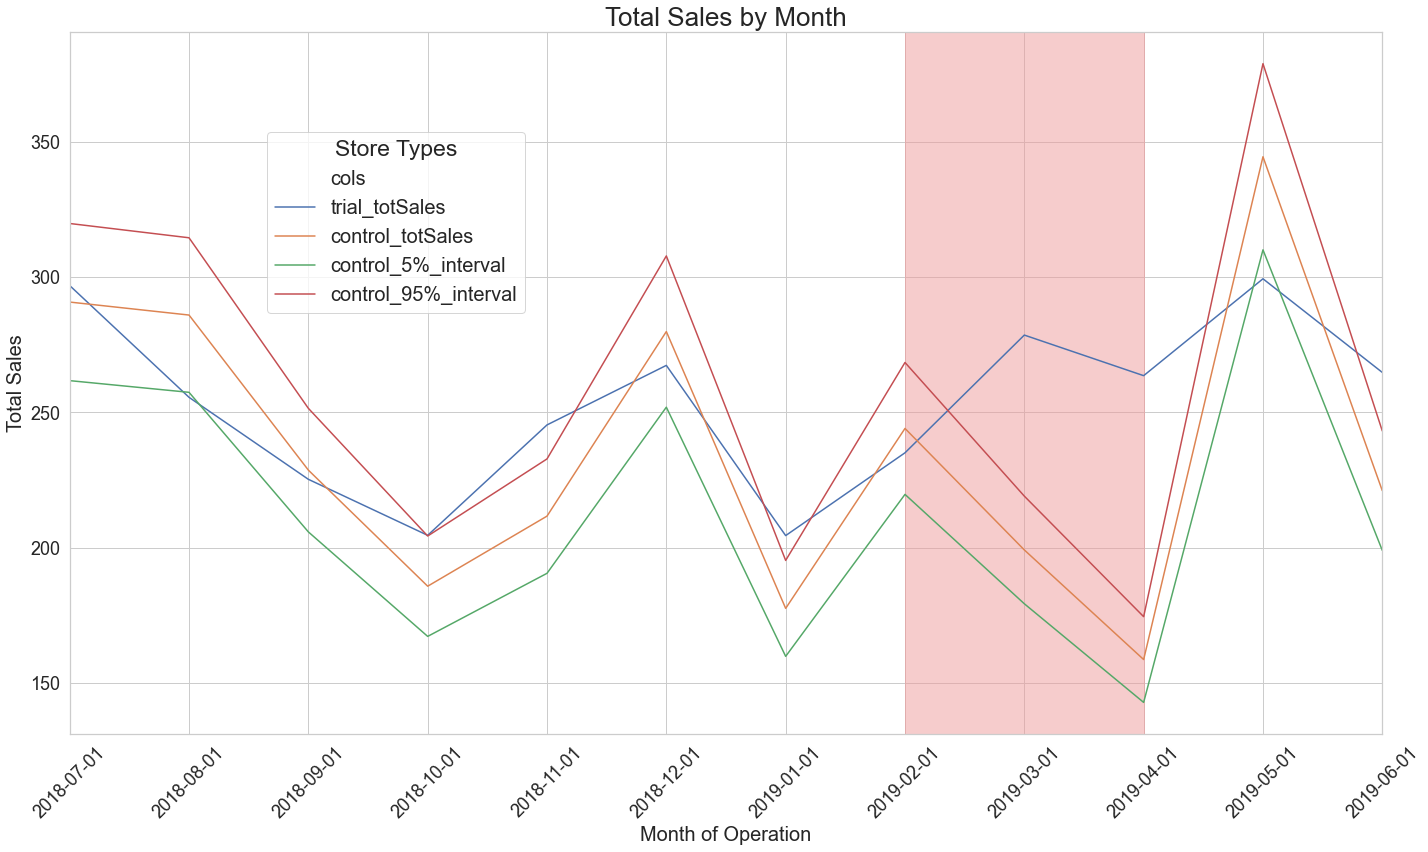

In [649]:
# plot
sns.set(style="whitegrid")

plt.figure(figsize=(20,12))

# plot
g = sns.lineplot(x="transaction_month", 
                y="vals", 
                hue='cols', 
                data=df
                )

# Highlight trial period
# plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color = 'grey', alpha = 0.2)
g.axvspan("2019-02-01", "2019-04-01", color='#EF9A9A', alpha=0.5)

# set x labels orientation
plt.xticks(rotation=45)

# # set fontsize
plt.xlabel("Month of Operation", fontsize= 20)
plt.ylabel("Total Sales", fontsize=20)
plt.title("Total Sales by Month", fontsize=26)
plt.tick_params(labelsize=18)

# set xlim,ylims
plt.xlim(["2018-07-01","2019-06-01"])

plt.legend(title = "Store Types",
          loc=(0.15,0.6),
          fontsize=20,
          title_fontsize=23)

plt.tight_layout()

From this graph we can conclude that the trial store 77 is significantly different than the control store in the trial period (2019-02-01 to 2019-06-01)

In [350]:
measureOverTimeSales.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,transaction_month
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [351]:
# trial and control store number of customers
trial_nCustomers = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store, \
                                       ['transaction_month','nCustomers']].reset_index(drop=True)

control_nCustomers = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == ctrl_store, \
                                        ['transaction_month','nCustomers']].reset_index(drop=True)

In [356]:
display(trial_nCustomers)
display(control_nCustomers.head())

,transaction_month,nCustomers
0,2018-07-01,51
1,2018-08-01,47
2,2018-09-01,42
3,2018-10-01,37
4,2018-11-01,41
5,2018-12-01,46
6,2019-01-01,35
7,2019-02-01,45
8,2019-03-01,50
9,2019-04-01,47


,transaction_month,nCustomers
0,2018-07-01,51
1,2018-08-01,48
2,2018-09-01,42
3,2018-10-01,35
4,2018-11-01,40


In [360]:
# rename columns 
trial_nCustomers.columns = ['transaction_month', 'trial_nCustomers']
control_nCustomers.columns = ['transaction_month', 'control_nCustomers']

In [362]:
# merge the two dataframes
combineCustomers_df = pd.merge(trial_nCustomers, control_nCustomers, how='inner')
combineCustomers_df.head()

,transaction_month,trial_nCustomers,control_nCustomers
0,2018-07-01,51,51
1,2018-08-01,47,48
2,2018-09-01,42,42
3,2018-10-01,37,35
4,2018-11-01,41,40


In [363]:
# create two columns marking the confidence interval
combineCustomers_df['control_5%_interval'] = combineCustomers_df['control_nCustomers'] * (1-stdDev*2)
combineCustomers_df['control_95%_interval'] = combineCustomers_df['control_nCustomers'] * (1+stdDev*2)


In [364]:
combineCustomers_df.head()

,transaction_month,trial_nCustomers,control_nCustomers,control_5%_interval,control_95%_interval
0,2018-07-01,51,51,45.906042,56.093958
1,2018-08-01,47,48,43.205687,52.794313
2,2018-09-01,42,42,37.804976,46.195024
3,2018-10-01,37,35,31.504147,38.495853
4,2018-11-01,41,40,36.004739,43.995261


In [367]:
# melt combineCustomers_df for graphing later
melted_customer_df = combineCustomers_df.melt('transaction_month', var_name='cols',value_name='vals')

# convert transaction month to string datatype so xticks won't display time in seconds 
melted_customer_df['transaction_month'] = melted_customer_df['transaction_month'].astype("str")

In [370]:
# look at the first and last 5 datapoints
display(melted_customer_df.head())
display(melted_customer_df.tail())

,transaction_month,cols,vals
0,2018-07-01,trial_nCustomers,51.0
1,2018-08-01,trial_nCustomers,47.0
2,2018-09-01,trial_nCustomers,42.0
3,2018-10-01,trial_nCustomers,37.0
4,2018-11-01,trial_nCustomers,41.0


,transaction_month,cols,vals
43,2019-02-01,control_95%_interval,49.494669
44,2019-03-01,control_95%_interval,43.995261
45,2019-04-01,control_95%_interval,32.996446
46,2019-05-01,control_95%_interval,62.693247
47,2019-06-01,control_95%_interval,45.095143


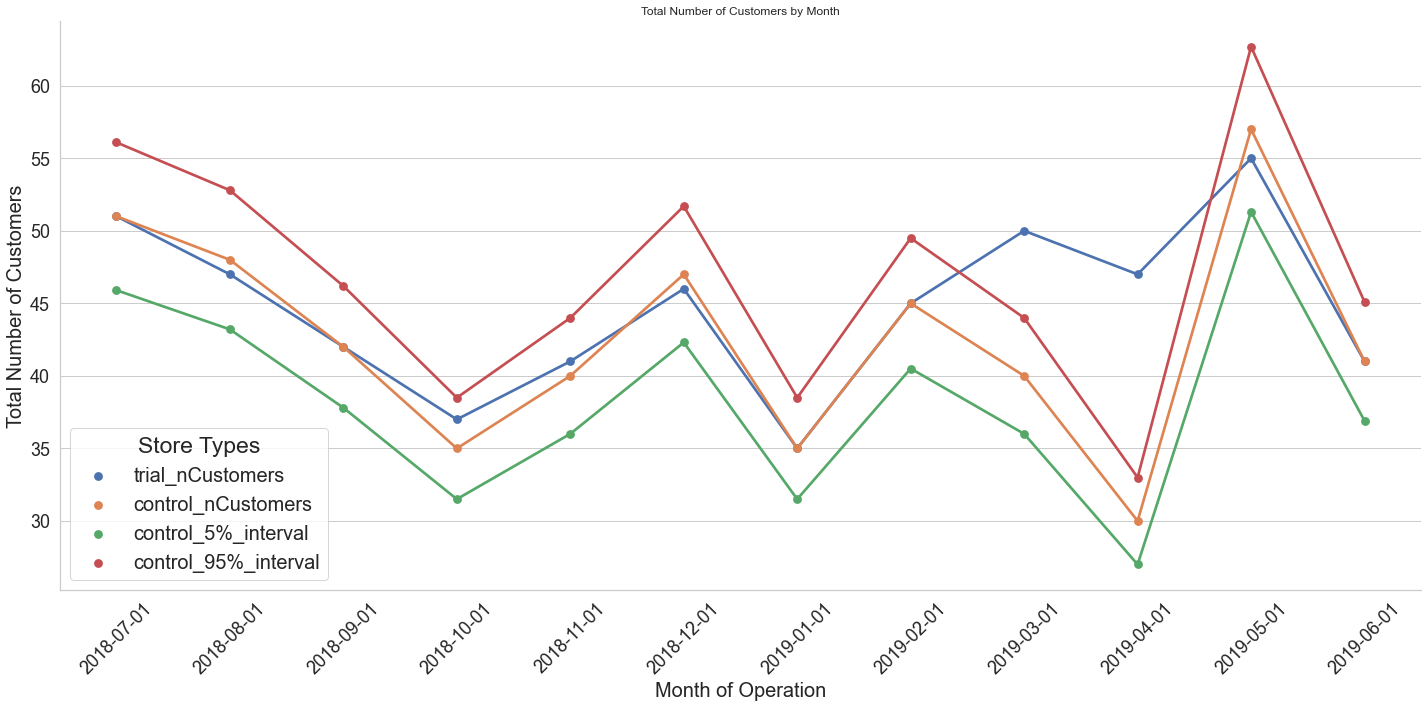

In [372]:
# plot
sns.set(style='whitegrid')

ax = sns.catplot(x = 'transaction_month',
                y = 'vals',
                hue = 'cols',
                data = melted_customer_df,
                kind = 'point',
                height = 10,
                aspect = 20/10,
                legend = False)

# set x labels orientation for visability
plt.xticks(rotation=45)

# set font sizes and labels
plt.xlabel("Month of Operation", fontsize = 20)
plt.ylabel("Total Number of Customers", fontsize = 20)
plt.title("Total Number of Customers by Month")
plt.tick_params(labelsize=18)

# set legend
plt.legend(title = 'Store Types',
          loc = 'best',
          fontsize=20,
          title_fontsize=23)

plt.tight_layout()


The number of customers for the trial store (store 77) is much higher than the control store during the trial period similar to the sales graph we identified earlier.

Other trial stores we have are store 86 and store 88 so i will now assess the impact for each of these two stores

## Trial Store 86

In [373]:
trial_store = 86
# find correlation for sales and customers using previously defined function
corr_nSales = findCorrelation(preTrialMeasures, trial_store, "totSales")
corr_nCustomers = findCorrelation(preTrialMeasures, trial_store, 'nCustomers')

In [374]:
# compute magnitude with new trial store
magnitude_nSales = findDifference(preTrialMeasures, trial_store, 'totSales')
magnitude_nCustomers = findDifference(preTrialMeasures, trial_store, 'nCustomers')

In [375]:
corr_nSales

,trial_store,other_stores,measure,correlation
0,86,1,totSales,0.445632
1,86,2,totSales,-0.403835
2,86,3,totSales,-0.261284
3,86,4,totSales,-0.039035
4,86,5,totSales,0.235159
...,...,...,...,...
255,86,268,totSales,-0.452182
256,86,269,totSales,0.697055
257,86,270,totSales,-0.730679
258,86,271,totSales,0.527637


In [380]:
# concatenate the sales together and customers together
corrMag_sales_df = pd.merge(corr_nSales, magnitude_nSales, how='inner')
corrMag_customers_df = pd.merge(corr_nCustomers, magnitude_nCustomers, how='inner')
corrMag_sales_df.head()

,trial_store,other_stores,measure,correlation,difference
0,86,1,totSales,0.445632,0.488334
1,86,2,totSales,-0.403835,0.321131
2,86,3,totSales,-0.261284,0.507515
3,86,4,totSales,-0.039035,0.635654
4,86,5,totSales,0.235159,0.579835


In [381]:
# calculate weighted average of each row using correlation and difference
# use 50% weighting for now assuming the two variables are equally important
corr_weight = 0.5
# for the sales dataframe
corrMag_sales_df['corrMagAVG_sales'] = corr_weight * corrMag_sales_df['correlation'] + \
                                    corr_weight * corrMag_sales_df['difference']
# for the customers dataframe
corrMag_customers_df['corrMagAVG_customers'] = corr_weight * corrMag_customers_df['correlation'] + \
                                        corr_weight * corrMag_customers_df['difference']

In [382]:
print("corrMag_sales_df")
display(corrMag_sales_df.head())
print("corrMag_customers_df")
corrMag_customers_df.head()

corrMag_sales_df


,trial_store,other_stores,measure,correlation,difference,corrMagAVG_sales
0,86,1,totSales,0.445632,0.488334,0.466983
1,86,2,totSales,-0.403835,0.321131,-0.041352
2,86,3,totSales,-0.261284,0.507515,0.123116
3,86,4,totSales,-0.039035,0.635654,0.298309
4,86,5,totSales,0.235159,0.579835,0.407497


corrMag_customers_df


,trial_store,other_stores,measure,correlation,difference,corrMagAVG_customers
0,86,1,nCustomers,0.485831,0.510204,0.498018
1,86,2,nCustomers,-0.086161,0.428571,0.171205
2,86,3,nCustomers,-0.353786,0.563025,0.104620
3,86,4,nCustomers,-0.169608,0.537815,0.184103
4,86,5,nCustomers,-0.253229,0.714286,0.230528


In [383]:
### FIND CONTROL STORE ###

# merge into one dataframe with just the corrMagAVG column
# pd.merge(corrMag_sales_df.reset_index(), corrMag_customers_df.reset_index(), how='inner')
control_store_df = pd.concat([corrMag_sales_df, corrMag_customers_df], axis=1)[['trial_store', 'other_stores','corrMagAVG_sales', "corrMagAVG_customers"]]
control_store_df.head()

,trial_store,trial_store,other_stores,other_stores,corrMagAVG_sales,corrMagAVG_customers
0,86,86,1,1,0.466983,0.498018
1,86,86,2,2,-0.041352,0.171205
2,86,86,3,3,0.123116,0.104620
3,86,86,4,4,0.298309,0.184103
4,86,86,5,5,0.407497,0.230528


In [384]:
# remove duplicate columns
control_store_df = control_store_df.loc[:, ~control_store_df.columns.duplicated()]

In [385]:
# check if changes are made
control_store_df.head()

,trial_store,other_stores,corrMagAVG_sales,corrMagAVG_customers
0,86,1,0.466983,0.498018
1,86,2,-0.041352,0.171205
2,86,3,0.123116,0.104620
3,86,4,0.298309,0.184103
4,86,5,0.407497,0.230528


In [386]:
# Store with the highest corrMagAVG score will be selected as the control store since it is the most similar ot the trial store
control_store_df['control_store'] = 0.5 * (control_store_df['corrMagAVG_sales'] +\
                                           control_store_df['corrMagAVG_customers'])

In [387]:
control_store_df.head()

,trial_store,other_stores,corrMagAVG_sales,corrMagAVG_customers,control_store
0,86,1,0.466983,0.498018,0.482500
1,86,2,-0.041352,0.171205,0.064927
2,86,3,0.123116,0.104620,0.113868
3,86,4,0.298309,0.184103,0.241206
4,86,5,0.407497,0.230528,0.319013


In [389]:
# select the control store based on the highest score
control_store_df.sort_values(by='control_store', ascending=False).head()

,trial_store,other_stores,corrMagAVG_sales,corrMagAVG_customers,control_store
147,86,155,0.808106,0.733343,0.770724
102,86,109,0.697120,0.742532,0.719826
107,86,114,0.631393,0.663384,0.647389
213,86,225,0.601841,0.684356,0.643099
130,86,138,0.593296,0.660565,0.626930


From this chart, since store 155 has the highest score, we will select store 155 as our control store.

In [390]:
# create checkpoint for preTrialMeasures
store_data_df = preTrialMeasures.reset_index(drop=True)
store_data_df.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [391]:
# set trial and control stores
ctrl_store = 155

trial_store

86

In [394]:
# select just the trial and control store
store_data_df.loc[(store_data_df['STORE_NBR'] == ctrl_store) |
                 (store_data_df['STORE_NBR'] == trial_store)]

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
560,86,201807,892.20,99,1.272727,1.992063,3.554582
561,86,201808,764.05,94,1.191489,1.919643,3.553721
562,86,201809,914.60,103,1.252427,2.000000,3.544961
563,86,201810,948.40,109,1.266055,2.000000,3.436232
564,86,201811,918.00,100,1.270000,2.000000,3.614173
565,86,201812,841.20,98,1.224490,2.000000,3.505000
566,86,201901,841.40,94,1.382979,2.000000,3.236154
1029,155,201807,924.60,101,1.237624,2.000000,3.698400
1030,155,201808,782.70,91,1.318681,1.908333,3.417904
1031,155,201809,1014.40,103,1.407767,2.000000,3.497931


In [397]:
# create store types for graphing later (store type as in trial/control/other store)
store_label = []
for i in range(store_data_df.shape[0]):
    if store_data_df['STORE_NBR'][i] == trial_store:
        store_label.append("trial_store")
    elif store_data_df['STORE_NBR'][i] == ctrl_store:
        store_label.append("control_store")
    else:
        store_label.append("other_stores")

store_data_df['store_type'] = store_label

In [398]:
# add a date column to store_data_df
store_data_df['transaction_dates'] = pd.to_datetime(store_data_df['yearmonth'], format = '%Y%m')

In [399]:
store_data_df.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,transaction_dates,store_type
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01,other_stores
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01,other_stores
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01,other_stores
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01,other_stores
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01,other_stores


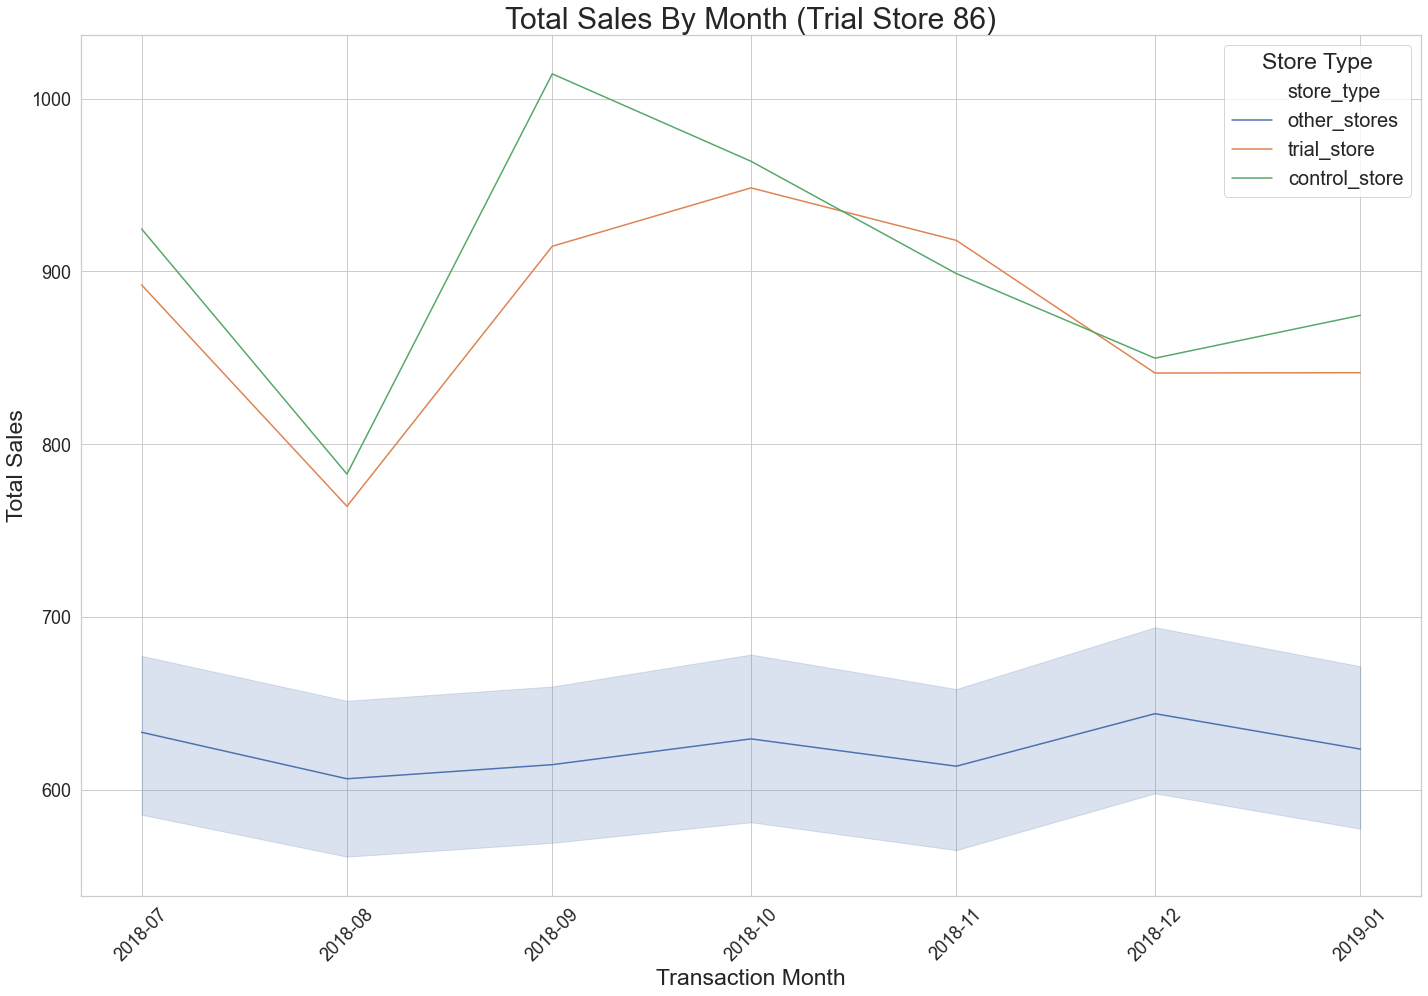

In [403]:
# visually check if drivers are indeed similar in the period before the trial
sns.set(style='whitegrid')
# set figure size
plt.figure(figsize=(20,14))

# create line chart
sns.lineplot(x = "transaction_dates",
            y = "totSales",
            hue = "store_type",
            data = store_data_df)

# set x label orientation
plt.xticks(rotation=45)

# set fontsize
plt.xlabel("Transaction Month", fontsize=23)
plt.ylabel("Total Sales", fontsize=23)
plt.title("total sales by month (trial store 86)".title(), fontsize=30)
plt.tick_params(labelsize=18)

# set legend location and fontsize
plt.legend(title = "store type".title(),
          loc='best',
          fontsize=20,
          title_fontsize=23)

# fit the graph
plt.tight_layout()

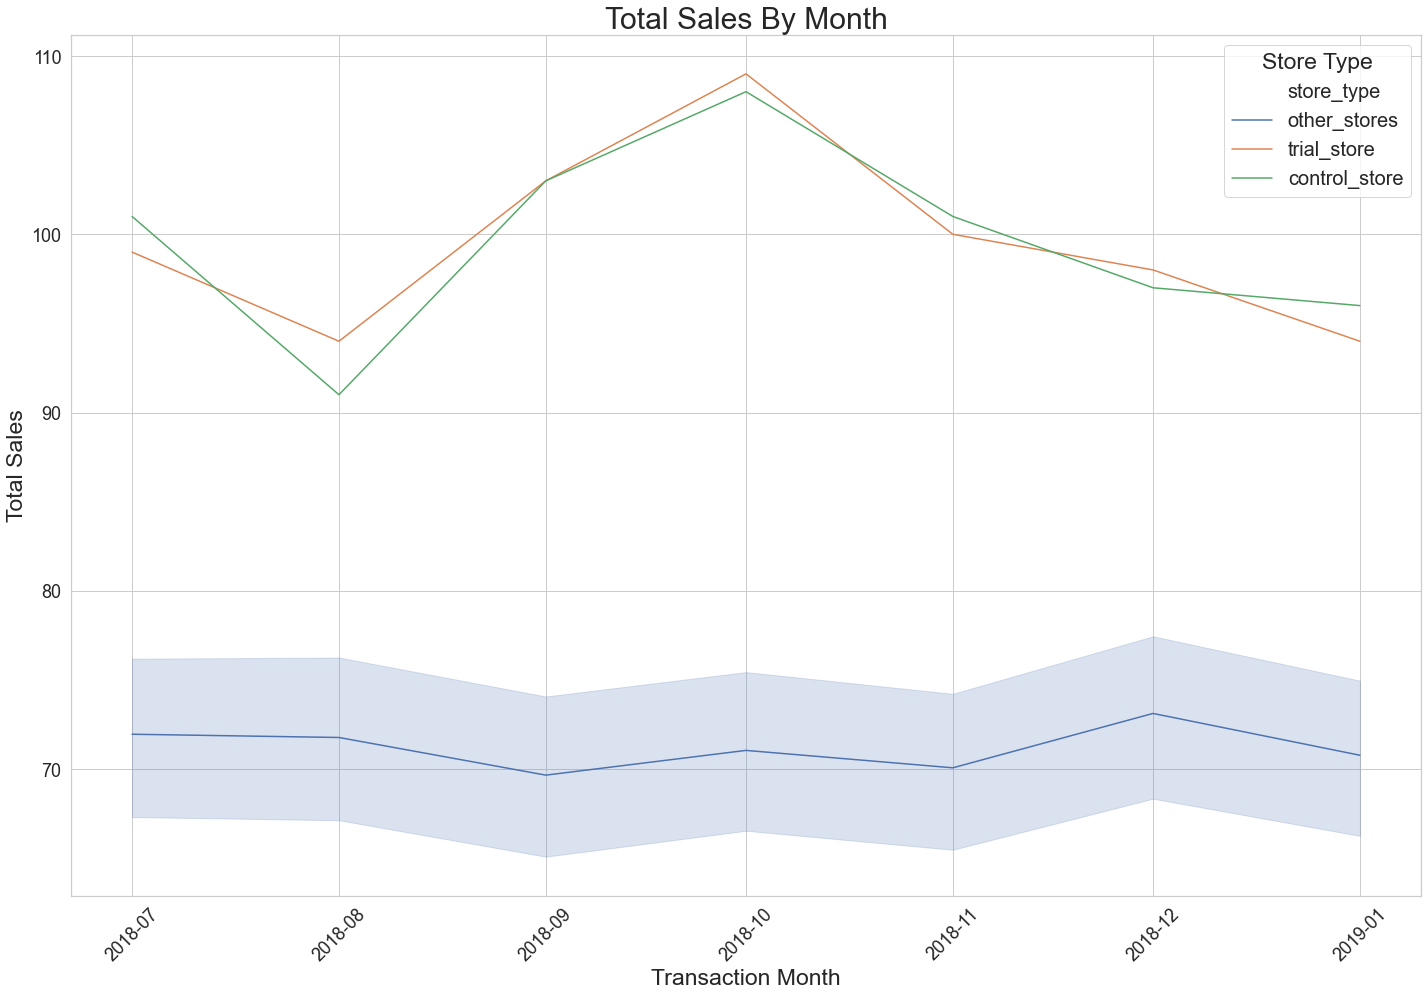

In [405]:
# graph the customers data
# visually check if drivers are indeed similar in the period before the trial
sns.set(style='whitegrid')
# set figure size
plt.figure(figsize=(20,14))

# create line chart
sns.lineplot(x = "transaction_dates",
            y = "nCustomers",
            hue = "store_type",
            data = store_data_df)

# set x label orientation
plt.xticks(rotation=45)

# set fontsize
plt.xlabel("Transaction Month", fontsize=23)
plt.ylabel("Total Sales", fontsize=23)
plt.title("total sales by month".title(), fontsize=30)
plt.tick_params(labelsize=18)

# set legend location and fontsize
plt.legend(title = "store type".title(),
          loc='best',
          fontsize=20,
          title_fontsize=23)

# fit the graph
plt.tight_layout()

Assessment for trial store 86

In [406]:
trial_store

86

In [407]:
# scale pre_trial control sales to match pre-trial store sales

# trial store total sales
trial_totSales = store_data_df.loc[store_data_df['STORE_NBR'] == trial_store, 'totSales'].sum()

# control store total sales
ctrl_totSales = store_data_df.loc[store_data_df['STORE_NBR'] == ctrl_store, 'totSales'].sum()

# scale numbers 
scalingFactorForControlSales = trial_totSales / ctrl_totSales
scalingFactorForControlSales

0.9700651481287746

In [408]:
# apply the scaling factor

scaled_control_stores = measureOverTime_df.loc[measureOverTime_df['STORE_NBR'] == ctrl_store]
scaled_control_stores

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,transaction_month
1793,155,201807,924.60,101,1.237624,2.000000,3.698400,2018-07-01
1794,155,201808,782.70,91,1.318681,1.908333,3.417904,2018-08-01
1795,155,201809,1014.40,103,1.407767,2.000000,3.497931,2018-09-01
1796,155,201810,963.80,108,1.259259,2.000000,3.543382,2018-10-01
1797,155,201811,898.80,101,1.336634,2.000000,3.328889,2018-11-01
1798,155,201812,849.80,97,1.247423,2.000000,3.511570,2018-12-01
1799,155,201901,874.60,96,1.312500,2.000000,3.470635,2019-01-01
1800,155,201902,891.20,95,1.336842,2.000000,3.508661,2019-02-01
1801,155,201903,804.40,94,1.276596,2.000000,3.351667,2019-03-01
1802,155,201904,844.60,99,1.222222,2.000000,3.490083,2019-04-01


In [409]:
# reorder columns
scaled_control_stores = scaled_control_stores[['STORE_NBR', 'yearmonth', 'nCustomers', 'nTxnPerCust',
       'nChipsPerTxn', 'avgPricePerUnit', 'totSales']]

In [410]:
scaled_control_stores['control_sales'] = scaled_control_stores['totSales'] * scalingFactorForControlSales

In [411]:
scaled_control_stores

,STORE_NBR,yearmonth,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,totSales,control_sales
1793,155,201807,101,1.237624,2.000000,3.698400,924.60,896.922236
1794,155,201808,91,1.318681,1.908333,3.417904,782.70,759.269991
1795,155,201809,103,1.407767,2.000000,3.497931,1014.40,984.034086
1796,155,201810,108,1.259259,2.000000,3.543382,963.80,934.948790
1797,155,201811,101,1.336634,2.000000,3.328889,898.80,871.894555
1798,155,201812,97,1.247423,2.000000,3.511570,849.80,824.361363
1799,155,201901,96,1.312500,2.000000,3.470635,874.60,848.418979
1800,155,201902,95,1.336842,2.000000,3.508661,891.20,864.522060
1801,155,201903,94,1.276596,2.000000,3.351667,804.40,780.320405
1802,155,201904,99,1.222222,2.000000,3.490083,844.60,819.317024


In [412]:
## create a percentagedifference dataframe

# calcualte total sales for the trials data
trial_sales = measureOverTime_df.loc[measureOverTime_df['STORE_NBR'] == trial_store, 'totSales']

# build the dataframe for analysis later
percentage_difference_df = scaled_control_stores[['yearmonth', 'control_sales']]
percentage_difference_df['trial_sales'] = trial_sales.values
percentage_difference_df

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,yearmonth,control_sales,trial_sales
1793,201807,896.922236,892.20
1794,201808,759.269991,764.05
1795,201809,984.034086,914.60
1796,201810,934.948790,948.40
1797,201811,871.894555,918.00
1798,201812,824.361363,841.20
1799,201901,848.418979,841.40
1800,201902,864.522060,913.20
1801,201903,780.320405,1026.80
1802,201904,819.317024,848.20


In [413]:
## calculate percentage difference

# select control_sales
control2_sales = percentage_difference_df['control_sales']

# select trial sales
trial2_sales = percentage_difference_df['trial_sales']

# store calculated value in a new column
percentage_difference_df['percentage_diff'] = abs(control2_sales - trial2_sales) / control2_sales

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [414]:
percentage_difference_df.reset_index(drop=True, inplace=True)

In [415]:
percentage_difference_df

,yearmonth,control_sales,trial_sales,percentage_diff
0,201807,896.922236,892.20,0.005265
1,201808,759.269991,764.05,0.006296
2,201809,984.034086,914.60,0.070561
3,201810,934.948790,948.40,0.014387
4,201811,871.894555,918.00,0.052880
5,201812,824.361363,841.20,0.020426
6,201901,848.418979,841.40,0.008273
7,201902,864.522060,913.20,0.056306
8,201903,780.320405,1026.80,0.315870
9,201904,819.317024,848.20,0.035253


Our null hypothesis is such that the trial period is the same as the pre-trial period
Take the standard deviation based on the scaled percentage difference in the pre-trial period

In [417]:
perDiff_preTrial = percentage_difference_df.loc[percentage_difference_df['yearmonth'] < 201902, 'percentage_diff']
stdDev = perDiff_preTrial.std()
stdDev

0.025833952854772656

In [418]:
# test with null hypothesis of there being 0 difference between trial and control stores
percentage_difference_df['tValues'] = (percentage_difference_df['percentage_diff'] - 0) / stdDev

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [419]:
# select the trial period
percentage_difference_df.loc[percentage_difference_df['yearmonth'] >= 201902]

,yearmonth,control_sales,trial_sales,percentage_diff,tValues
7,201902,864.522060,913.2,0.056306,2.179542
8,201903,780.320405,1026.8,0.315870,12.226922
9,201904,819.317024,848.2,0.035253,1.364580
10,201905,895.224622,889.3,0.006618,0.256176
11,201906,831.539845,838.0,0.007769,0.300725


In [420]:
# find the 95th percentile of the t distribution with degrees of freedom (df) of 7
# 95% confidence level
# degree of freedom of 7 is derived from have 9 pre-trial months. dof = 8-1=7
scipy.stats.t.ppf(q=0.95, df=7)

1.894578605061305

In [421]:
# create another checkpoint so we don't mess up the original data
measureOverTimeSales = measureOverTime_df

In [422]:

# add a transaction month column
measureOverTimeSales['transaction_month'] = pd.to_datetime(measureOverTimeSales['yearmonth'], format="%Y%m")

In [423]:
# trial and control store total sales
trial_sales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store, \
                                       ['transaction_month','totSales']].reset_index(drop=True)

control_sales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == ctrl_store, \
                                        ['transaction_month','totSales']].reset_index(drop=True)

In [425]:
display(trial_sales.head())
display(control_sales.head())

,transaction_month,totSales
0,2018-07-01,892.20
1,2018-08-01,764.05
2,2018-09-01,914.60
3,2018-10-01,948.40
4,2018-11-01,918.00


,transaction_month,totSales
0,2018-07-01,924.6
1,2018-08-01,782.7
2,2018-09-01,1014.4
3,2018-10-01,963.8
4,2018-11-01,898.8


In [426]:
# rename columns for trial and control data
trial_sales.columns = ['transaction_month', 'trial_totSales']
control_sales.columns = ['transaction_month', 'control_totSales']

In [427]:
combineSales_df = pd.merge(trial_sales, control_sales, how='inner')
combineSales_df

,transaction_month,trial_totSales,control_totSales
0,2018-07-01,892.20,924.60
1,2018-08-01,764.05,782.70
2,2018-09-01,914.60,1014.40
3,2018-10-01,948.40,963.80
4,2018-11-01,918.00,898.80
5,2018-12-01,841.20,849.80
6,2019-01-01,841.40,874.60
7,2019-02-01,913.20,891.20
8,2019-03-01,1026.80,804.40
9,2019-04-01,848.20,844.60


In [428]:
# create two columns marking the 95% and 5% confidence interval for graphing
combineSales_df['control_5%_interval'] = combineSales_df['control_totSales'] * (1 - stdDev*2)

combineSales_df['control_95%_interval'] = combineSales_df['control_totSales'] * (1 + stdDev*2)

combineSales_df

,transaction_month,trial_totSales,control_totSales,control_5%_interval,control_95%_interval
0,2018-07-01,892.20,924.60,876.827854,972.372146
1,2018-08-01,764.05,782.70,742.259530,823.140470
2,2018-09-01,914.60,1014.40,961.988076,1066.811924
3,2018-10-01,948.40,963.80,914.002472,1013.597528
4,2018-11-01,918.00,898.80,852.360886,945.239114
5,2018-12-01,841.20,849.80,805.892614,893.707386
6,2019-01-01,841.40,874.60,829.411250,919.788750
7,2019-02-01,913.20,891.20,845.153562,937.246438
8,2019-03-01,1026.80,804.40,762.838337,845.961663
9,2019-04-01,848.20,844.60,800.961287,888.238713


In [429]:
# melt combineSales_df so i can use the hue parameter later on seaborn
melted_df = combineSales_df.melt('transaction_month', var_name='cols',  value_name='vals')

# convert transaction_month to string datatype so xticks won't display time in seconds later
melted_df['transaction_month'] = melted_df['transaction_month'].astype("str")

In [431]:
melted_df

,transaction_month,cols,vals
0,2018-07-01,trial_totSales,892.200000
1,2018-08-01,trial_totSales,764.050000
2,2018-09-01,trial_totSales,914.600000
3,2018-10-01,trial_totSales,948.400000
4,2018-11-01,trial_totSales,918.000000
5,2018-12-01,trial_totSales,841.200000
6,2019-01-01,trial_totSales,841.400000
7,2019-02-01,trial_totSales,913.200000
8,2019-03-01,trial_totSales,1026.800000
9,2019-04-01,trial_totSales,848.200000


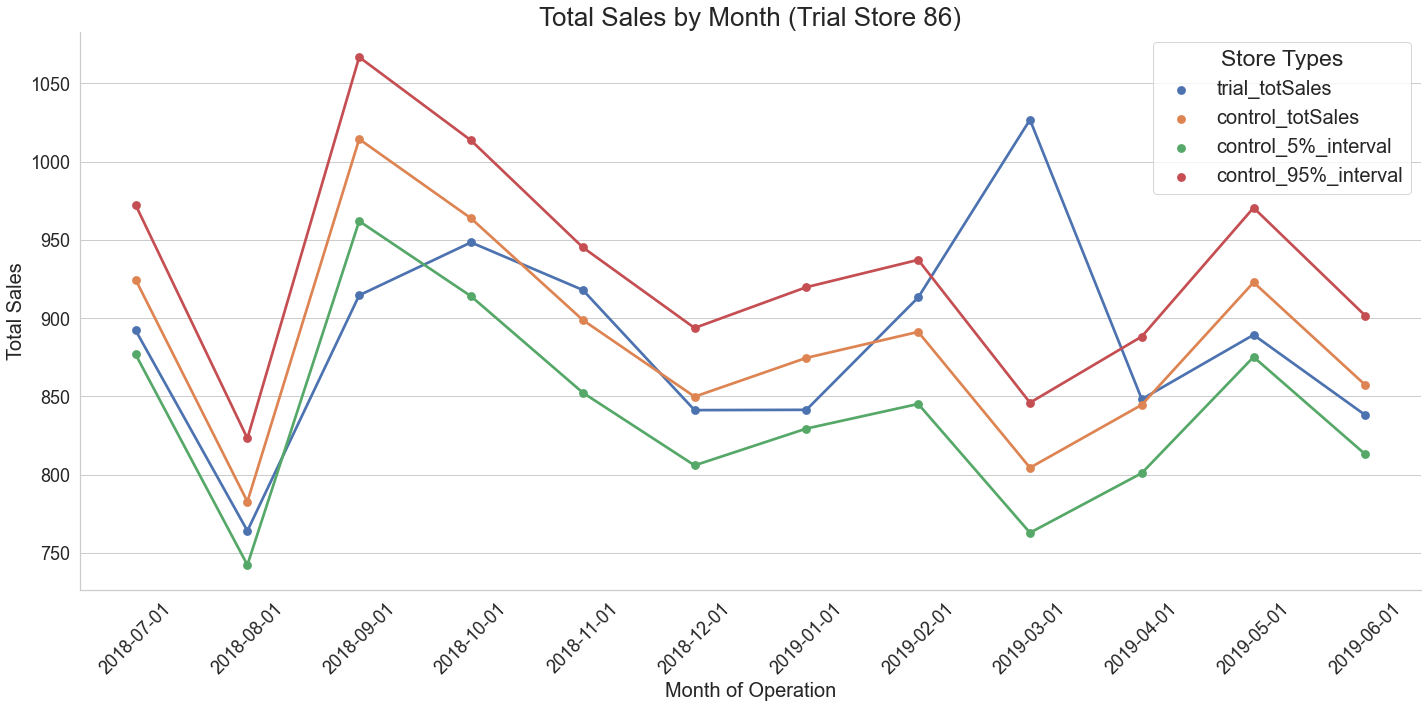

In [433]:
# plot
sns.set(style="whitegrid")

# plot
g = sns.catplot(x="transaction_month", 
                y="vals", 
                hue='cols', 
                data=melted_df, 
                kind='point', 
                height=10, 
                aspect=20/10,
                legend=False)


# set x labels orientation
plt.xticks(rotation=45)

# # set fontsize
plt.xlabel("Month of Operation", fontsize= 20)
plt.ylabel("Total Sales", fontsize=20)
plt.title("Total Sales by Month (Trial Store 86)", fontsize=26)
plt.tick_params(labelsize=18)



plt.legend(title = "Store Types",
          loc='best',
          fontsize=20,
          title_fontsize=23)

plt.tight_layout()

trial store 86 is not significantly different to its control store in the trial period. This relationship was shown in the graph where the trial store's performance lie within the confidence interval of the control store in two of the three trial months (trial months: from 2019-02 to 2019-06)

This time make a graph looking at the number of customers 

In [434]:
measureOverTimeSales.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,transaction_month
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [435]:
# trial and control store nCustomers
trial_nCustomers = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store, \
                                           ['transaction_month', 'nCustomers']].reset_index(drop=True)
control_nCustomers = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == ctrl_store, \
                                             ['transaction_month', 'nCustomers']].reset_index(drop=True)

In [436]:
display(trial_nCustomers.head())
display(control_nCustomers.head())

,transaction_month,nCustomers
0,2018-07-01,99
1,2018-08-01,94
2,2018-09-01,103
3,2018-10-01,109
4,2018-11-01,100


,transaction_month,nCustomers
0,2018-07-01,101
1,2018-08-01,91
2,2018-09-01,103
3,2018-10-01,108
4,2018-11-01,101


In [439]:
# rename columns for trial and control data
trial_nCustomers.columns = ['transaction_month', 'trial_nCustomers']
control_nCustomers.columns = ['transaction_month', 'control_nCustomers']

In [440]:
# merge the two dataframes
combineCustomers_df = pd.merge(trial_nCustomers, control_nCustomers, how='inner')
combineCustomers_df

,transaction_month,trial_nCustomers,control_nCustomers
0,2018-07-01,99,101
1,2018-08-01,94,91
2,2018-09-01,103,103
3,2018-10-01,109,108
4,2018-11-01,100,101
5,2018-12-01,98,97
6,2019-01-01,94,96
7,2019-02-01,107,95
8,2019-03-01,115,94
9,2019-04-01,105,99


In [442]:
# create two columns marking the 95% and 5% confidence interval and graph later
combineCustomers_df['control_5%_interval'] = combineCustomers_df['control_nCustomers'] * (1-stdDev*2)

combineCustomers_df['control_95%_interval'] = combineCustomers_df['control_nCustomers'] * (1+stdDev*2)

In [443]:
combineCustomers_df.head()

,transaction_month,trial_nCustomers,control_nCustomers,control_5%_interval,control_95%_interval
0,2018-07-01,99,101,95.781542,106.218458
1,2018-08-01,94,91,86.298221,95.701779
2,2018-09-01,103,103,97.678206,108.321794
3,2018-10-01,109,108,102.419866,113.580134
4,2018-11-01,100,101,95.781542,106.218458


In [444]:
# melt combineCustomers_df for graphing
melted_customer_df = combineCustomers_df.melt('transaction_month',var_name='cols',value_name='vals')

# convert transaction month to string datatype so xticks won't display time in seconds
melted_customer_df['transaction_month'] = melted_customer_df['transaction_month'].astype("str")

In [445]:
display(melted_customer_df.head())
display(melted_customer_df.tail())

,transaction_month,cols,vals
0,2018-07-01,trial_nCustomers,99.0
1,2018-08-01,trial_nCustomers,94.0
2,2018-09-01,trial_nCustomers,103.0
3,2018-10-01,trial_nCustomers,109.0
4,2018-11-01,trial_nCustomers,100.0


,transaction_month,cols,vals
43,2019-02-01,control_95%_interval,99.908451
44,2019-03-01,control_95%_interval,98.856783
45,2019-04-01,control_95%_interval,104.115123
46,2019-05-01,control_95%_interval,111.476798
47,2019-06-01,control_95%_interval,99.908451


In [447]:
trial_store

86

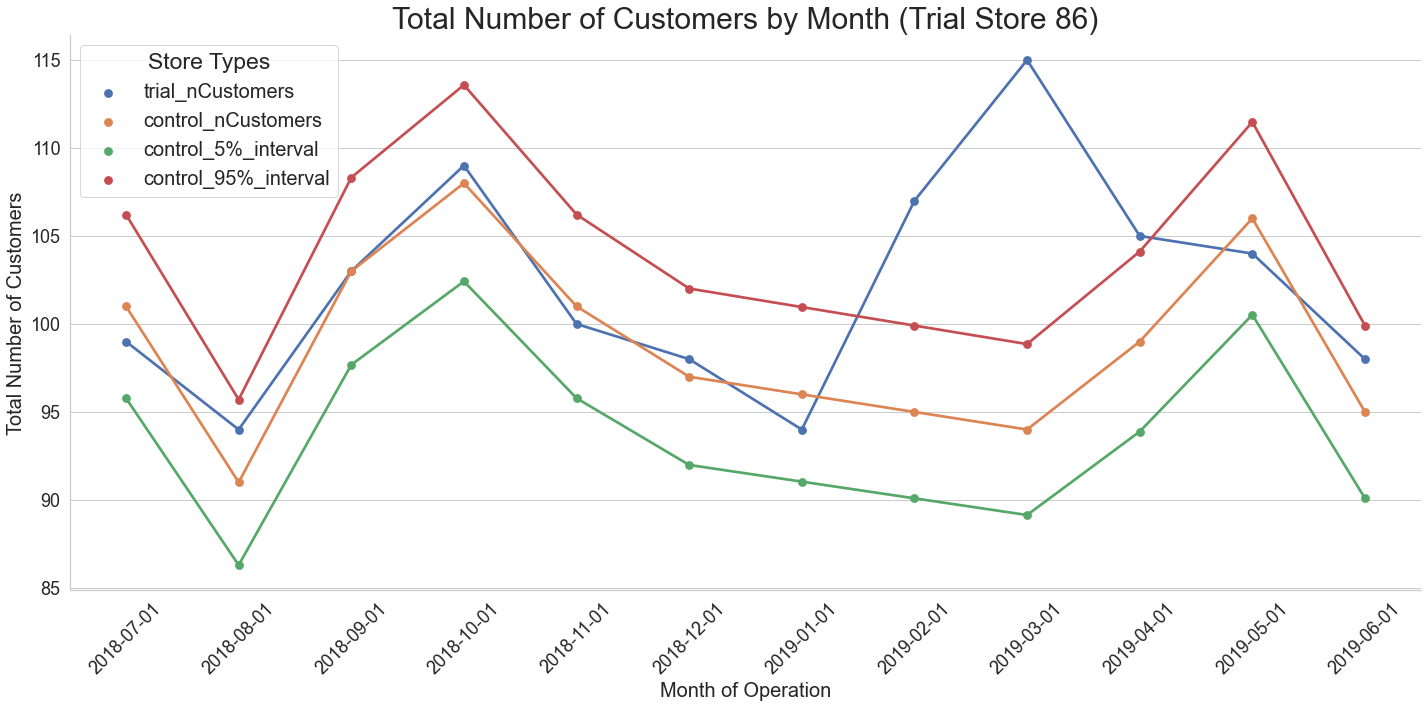

In [448]:
sns.set(style='whitegrid')

ax = sns.catplot(x = 'transaction_month',
                y = 'vals',
                hue = 'cols',
                data = melted_customer_df,
                kind = 'point',
                height = 10,
                aspect = 20/10,
                legend = False)

# set x labels orientation for visability
plt.xticks(rotation=45)

# set font sizes and labels
plt.xlabel("Month of Operation", fontsize = 20)
plt.ylabel("Total Number of Customers", fontsize = 20)
plt.title("Total Number of Customers by Month (Trial Store 86)",fontsize=30)
plt.tick_params(labelsize=18)

# set legend
plt.legend(title = 'Store Types',
          loc = 'best',
          fontsize=20,
          title_fontsize=23)

plt.tight_layout()

## Trial store 88

do the same thing like i did for the previous two stores 

In [450]:
trial_store = 88
# find correlation for sales and customers using previously defined function
corr_nSales = findCorrelation(preTrialMeasures, trial_store, "totSales")
corr_nCustomers = findCorrelation(preTrialMeasures, trial_store, 'nCustomers')

In [451]:
# compute magnitude with new trial store
magnitude_nSales = findDifference(preTrialMeasures, trial_store, 'totSales')
magnitude_nCustomers = findDifference(preTrialMeasures, trial_store, 'nCustomers')

In [452]:
corr_nSales

,trial_store,other_stores,measure,correlation
0,88,1,totSales,0.813636
1,88,2,totSales,-0.067927
2,88,3,totSales,-0.507847
3,88,4,totSales,-0.745566
4,88,5,totSales,0.190330
...,...,...,...,...
255,88,268,totSales,-0.021429
256,88,269,totSales,-0.172578
257,88,270,totSales,-0.723272
258,88,271,totSales,-0.103037


In [453]:
# concatenate the sales together and customers together
corrMag_sales_df = pd.merge(corr_nSales, magnitude_nSales, how='inner')
corrMag_customers_df = pd.merge(corr_nCustomers, magnitude_nCustomers, how='inner')
corrMag_sales_df.head()

,trial_store,other_stores,measure,correlation,difference
0,88,1,totSales,0.813636,0.548959
1,88,2,totSales,-0.067927,0.541212
2,88,3,totSales,-0.507847,0.458109
3,88,4,totSales,-0.745566,0.484447
4,88,5,totSales,0.190330,0.496409


In [454]:
# calculate weighted average of each row using correlation and difference
# use 50% weighting for now assuming the two variables are equally important
corr_weight = 0.5
# for the sales dataframe
corrMag_sales_df['corrMagAVG_sales'] = corr_weight * corrMag_sales_df['correlation'] + \
                                    corr_weight * corrMag_sales_df['difference']
# for the customers dataframe
corrMag_customers_df['corrMagAVG_customers'] = corr_weight * corrMag_customers_df['correlation'] + \
                                        corr_weight * corrMag_customers_df['difference']

In [455]:
print("corrMag_sales_df")
display(corrMag_sales_df.head())
print("corrMag_customers_df")
corrMag_customers_df.head()

corrMag_sales_df


,trial_store,other_stores,measure,correlation,difference,corrMagAVG_sales
0,88,1,totSales,0.813636,0.548959,0.681297
1,88,2,totSales,-0.067927,0.541212,0.236643
2,88,3,totSales,-0.507847,0.458109,-0.024869
3,88,4,totSales,-0.745566,0.484447,-0.130559
4,88,5,totSales,0.190330,0.496409,0.343370


corrMag_customers_df


,trial_store,other_stores,measure,correlation,difference,corrMagAVG_customers
0,88,1,nCustomers,0.305334,0.357143,0.331238
1,88,2,nCustomers,-0.452379,0.285714,-0.083332
2,88,3,nCustomers,0.522884,0.683673,0.603279
3,88,4,nCustomers,-0.361503,0.577922,0.108210
4,88,5,nCustomers,-0.025320,0.558442,0.266561


In [520]:
### FIND CONTROL STORE ###

# merge into one dataframe with just the corrMagAVG column
# pd.merge(corrMag_sales_df.reset_index(), corrMag_customers_df.reset_index(), how='inner')
control_store_df = pd.concat([corrMag_sales_df, corrMag_customers_df], axis=1)[['trial_store', 'other_stores','corrMagAVG_sales', "corrMagAVG_customers"]]
control_store_df.head()

,trial_store,trial_store,other_stores,other_stores,corrMagAVG_sales,corrMagAVG_customers
0,88,88,1,1,0.681297,0.331238
1,88,88,2,2,0.236643,-0.083332
2,88,88,3,3,-0.024869,0.603279
3,88,88,4,4,-0.130559,0.108210
4,88,88,5,5,0.343370,0.266561


In [521]:
# remove duplicate columns
control_store_df = control_store_df.loc[:, ~control_store_df.columns.duplicated()]

In [522]:
# check if changes are made
control_store_df.head()

,trial_store,other_stores,corrMagAVG_sales,corrMagAVG_customers
0,88,1,0.681297,0.331238
1,88,2,0.236643,-0.083332
2,88,3,-0.024869,0.603279
3,88,4,-0.130559,0.108210
4,88,5,0.343370,0.266561


In [523]:
# Store with the highest corrMagAVG score will be selected as the control store since it is the most similar ot the trial store
control_store_df['control_score'] = 0.5 * (control_store_df['corrMagAVG_sales'] +\
                                           control_store_df['corrMagAVG_customers'])

In [524]:
control_store_df.head()

,trial_store,other_stores,corrMagAVG_sales,corrMagAVG_customers,control_score
0,88,1,0.681297,0.331238,0.506268
1,88,2,0.236643,-0.083332,0.076655
2,88,3,-0.024869,0.603279,0.289205
3,88,4,-0.130559,0.108210,-0.011175
4,88,5,0.343370,0.266561,0.304965


In [526]:
# select the control store based on the highest score
control_store_df.sort_values(by='control_score', ascending=False).head()

,trial_store,other_stores,corrMagAVG_sales,corrMagAVG_customers,control_score
170,88,178,0.650803,0.707828,0.679316
12,88,14,0.646064,0.685774,0.665919
126,88,134,0.775084,0.540154,0.657619
225,88,237,0.451974,0.777235,0.614604
179,88,187,0.616752,0.594560,0.605656


From this chart, since store 178 has the highest score, we will select store 155 as our control store.

The control scores doesn't seem very high but we will try it anyways to see how it compare to the trial store

In [527]:
# create checkpoint for preTrialMeasures
store_data_df = preTrialMeasures.reset_index(drop=True)
store_data_df.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,3.378947


In [528]:
# set trial and control stores
ctrl_store = 178

trial_store

88

In [529]:
# select just the trial and control store
store_data_df.loc[(store_data_df['STORE_NBR'] == ctrl_store) |
                 (store_data_df['STORE_NBR'] == trial_store)]

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
574,88,201807,1310.0,129,1.186047,2.000000,4.281046
575,88,201808,1323.8,131,1.221374,1.893750,4.368977
576,88,201809,1423.0,124,1.282258,2.000000,4.474843
577,88,201810,1352.4,123,1.284553,2.000000,4.279747
578,88,201811,1382.8,130,1.207692,2.000000,4.403822
579,88,201812,1325.2,126,1.182540,2.000000,4.446980
580,88,201901,1266.4,117,1.247863,2.000000,4.336986
1190,178,201807,952.0,107,1.233645,2.000000,3.606061
1191,178,201808,915.5,108,1.250000,1.874074,3.618577
1192,178,201809,954.4,101,1.316832,2.000000,3.587970


In [530]:
# create store types for graphing later (store type as in trial/control/other store)
store_label = []
for i in range(store_data_df.shape[0]):
    if store_data_df['STORE_NBR'][i] == trial_store:
        store_label.append("trial_store")
    elif store_data_df['STORE_NBR'][i] == ctrl_store:
        store_label.append("control_store")
    else:
        store_label.append("other_stores")

store_data_df['store_type'] = store_label

In [531]:
# add a date column to store_data_df
store_data_df['transaction_dates'] = pd.to_datetime(store_data_df['yearmonth'], format = '%Y%m')

In [532]:
store_data_df.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,store_type,transaction_dates
0,1,201807,206.9,49,1.061224,1.192308,3.337097,other_stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,other_stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,other_stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,other_stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,other_stores,2018-11-01


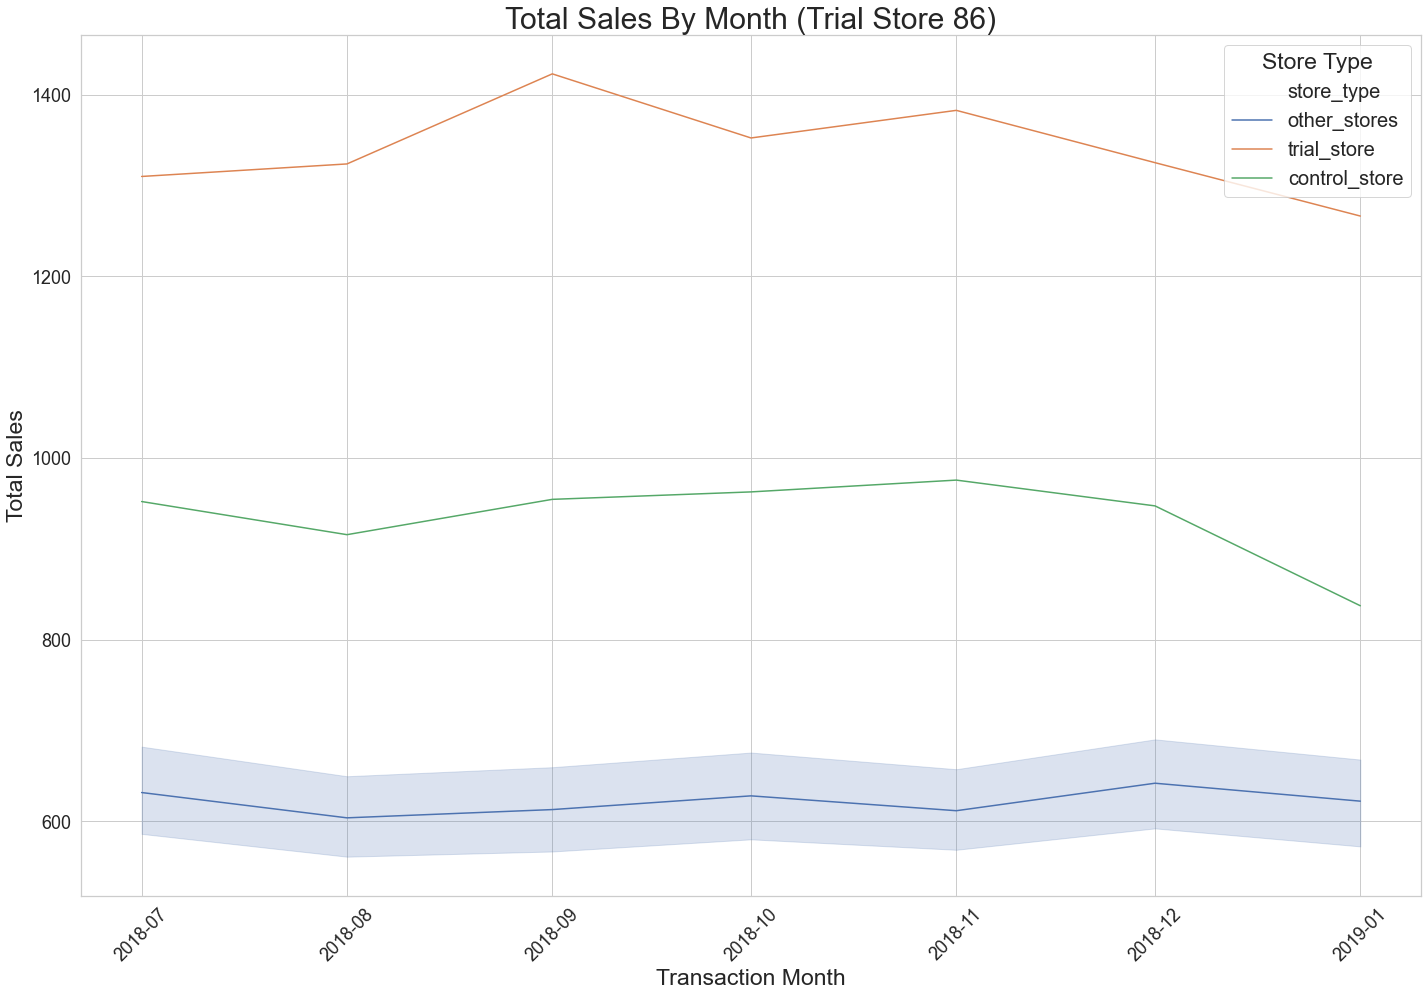

In [533]:
# visually check if drivers are indeed similar in the period before the trial
sns.set(style='whitegrid')
# set figure size
plt.figure(figsize=(20,14))

# create line chart
sns.lineplot(x = "transaction_dates",
            y = "totSales",
            hue = "store_type",
            data = store_data_df)

# set x label orientation
plt.xticks(rotation=45)

# set fontsize
plt.xlabel("Transaction Month", fontsize=23)
plt.ylabel("Total Sales", fontsize=23)
plt.title("total sales by month (trial store 86)".title(), fontsize=30)
plt.tick_params(labelsize=18)

# set legend location and fontsize
plt.legend(title = "store type".title(),
          loc='best',
          fontsize=20,
          title_fontsize=23)

# fit the graph
plt.tight_layout()

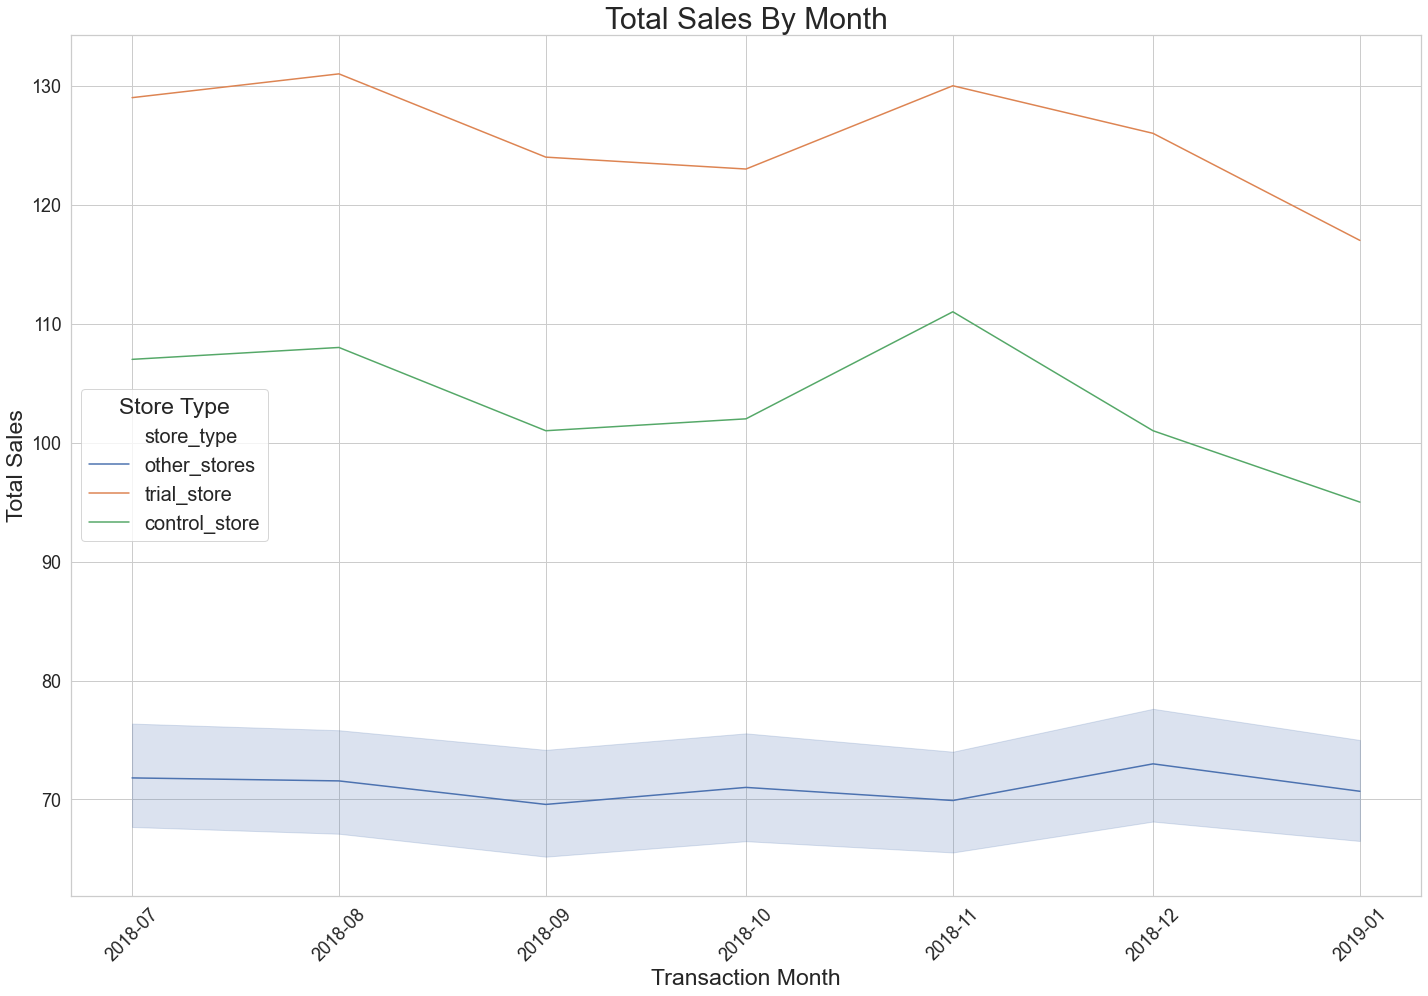

In [534]:
# graph the customers data
# visually check if drivers are indeed similar in the period before the trial
sns.set(style='whitegrid')
# set figure size
plt.figure(figsize=(20,14))

# create line chart
sns.lineplot(x = "transaction_dates",
            y = "nCustomers",
            hue = "store_type",
            data = store_data_df)

# set x label orientation
plt.xticks(rotation=45)

# set fontsize
plt.xlabel("Transaction Month", fontsize=23)
plt.ylabel("Total Sales", fontsize=23)
plt.title("total sales by month".title(), fontsize=30)
plt.tick_params(labelsize=18)

# set legend location and fontsize
plt.legend(title = "store type".title(),
          loc='best',
          fontsize=20,
          title_fontsize=23)

# fit the graph
plt.tight_layout()

Assessment for trial store 86

In [535]:
trial_store

88

In [536]:
# scale pre_trial control sales to match pre-trial store sales

# trial store total sales
trial_totSales = store_data_df.loc[store_data_df['STORE_NBR'] == trial_store, 'totSales'].sum()

# control store total sales
ctrl_totSales = store_data_df.loc[store_data_df['STORE_NBR'] == ctrl_store, 'totSales'].sum()

# scale numbers 
scalingFactorForControlSales = trial_totSales / ctrl_totSales
scalingFactorForControlSales

1.4338146535258616

In [537]:
# apply the scaling factor

scaled_control_stores = measureOverTime_df.loc[measureOverTime_df['STORE_NBR'] == ctrl_store]
scaled_control_stores

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,transaction_month
2069,178,201807,952.0,107,1.233645,2.000000,3.606061,2018-07-01
2070,178,201808,915.5,108,1.250000,1.874074,3.618577,2018-08-01
2071,178,201809,954.4,101,1.316832,2.000000,3.587970,2018-09-01
2072,178,201810,962.6,102,1.421569,2.000000,3.319310,2018-10-01
2073,178,201811,975.6,111,1.252252,2.000000,3.509353,2018-11-01
2074,178,201812,947.2,101,1.336634,2.000000,3.508148,2018-12-01
2075,178,201901,837.2,95,1.284211,2.000000,3.431148,2019-01-01
2076,178,201902,1088.8,107,1.373832,2.000000,3.703401,2019-02-01
2077,178,201903,998.8,114,1.254386,2.000000,3.492308,2019-03-01
2078,178,201904,1059.8,117,1.282051,2.000000,3.532667,2019-04-01


In [538]:
# reorder columns
scaled_control_stores = scaled_control_stores[['STORE_NBR', 'yearmonth', 'nCustomers', 'nTxnPerCust',
       'nChipsPerTxn', 'avgPricePerUnit', 'totSales']]

In [539]:
scaled_control_stores['control_sales'] = scaled_control_stores['totSales'] * scalingFactorForControlSales

In [540]:
scaled_control_stores

,STORE_NBR,yearmonth,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,totSales,control_sales
2069,178,201807,107,1.233645,2.000000,3.606061,952.0,1364.991550
2070,178,201808,108,1.250000,1.874074,3.618577,915.5,1312.657315
2071,178,201809,101,1.316832,2.000000,3.587970,954.4,1368.432705
2072,178,201810,102,1.421569,2.000000,3.319310,962.6,1380.189985
2073,178,201811,111,1.252252,2.000000,3.509353,975.6,1398.829576
2074,178,201812,101,1.336634,2.000000,3.508148,947.2,1358.109240
2075,178,201901,95,1.284211,2.000000,3.431148,837.2,1200.389628
2076,178,201902,107,1.373832,2.000000,3.703401,1088.8,1561.137395
2077,178,201903,114,1.254386,2.000000,3.492308,998.8,1432.094076
2078,178,201904,117,1.282051,2.000000,3.532667,1059.8,1519.556770


In [541]:
## create a percentagedifference dataframe

# calcualte total sales for the trials data
trial_sales = measureOverTime_df.loc[measureOverTime_df['STORE_NBR'] == trial_store, 'totSales']

# build the dataframe for analysis later
percentage_difference_df = scaled_control_stores[['yearmonth', 'control_sales']]
percentage_difference_df['trial_sales'] = trial_sales.values
percentage_difference_df

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,yearmonth,control_sales,trial_sales
2069,201807,1364.991550,1310.00
2070,201808,1312.657315,1323.80
2071,201809,1368.432705,1423.00
2072,201810,1380.189985,1352.40
2073,201811,1398.829576,1382.80
2074,201812,1358.109240,1325.20
2075,201901,1200.389628,1266.40
2076,201902,1561.137395,1370.20
2077,201903,1432.094076,1477.20
2078,201904,1519.556770,1439.40


In [542]:
## calculate percentage difference

# select control_sales
control2_sales = percentage_difference_df['control_sales']

# select trial sales
trial2_sales = percentage_difference_df['trial_sales']

# store calculated value in a new column
percentage_difference_df['percentage_diff'] = abs(control2_sales - trial2_sales) / control2_sales

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [543]:
percentage_difference_df.reset_index(drop=True, inplace=True)

In [544]:
percentage_difference_df

,yearmonth,control_sales,trial_sales,percentage_diff
0,201807,1364.991550,1310.00,0.040287
1,201808,1312.657315,1323.80,0.008489
2,201809,1368.432705,1423.00,0.039876
3,201810,1380.189985,1352.40,0.020135
4,201811,1398.829576,1382.80,0.011459
5,201812,1358.109240,1325.20,0.024232
6,201901,1200.389628,1266.40,0.054991
7,201902,1561.137395,1370.20,0.122307
8,201903,1432.094076,1477.20,0.031496
9,201904,1519.556770,1439.40,0.052750


Our null hypothesis is such that the trial period is the same as the pre-trial period
Take the standard deviation based on the scaled percentage difference in the pre-trial period

In [545]:
perDiff_preTrial = percentage_difference_df.loc[percentage_difference_df['yearmonth'] < 201902, 'percentage_diff']
stdDev = perDiff_preTrial.std()
stdDev

0.01707405192279777

In [546]:
# test with null hypothesis of there being 0 difference between trial and control stores
percentage_difference_df['tValues'] = (percentage_difference_df['percentage_diff'] - 0) / stdDev

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [547]:
# select the trial period
percentage_difference_df.loc[percentage_difference_df['yearmonth'] >= 201902]

,yearmonth,control_sales,trial_sales,percentage_diff,tValues
7,201902,1561.137395,1370.20,0.122307,7.163302
8,201903,1432.094076,1477.20,0.031496,1.844699
9,201904,1519.556770,1439.40,0.052750,3.089489
10,201905,1273.227412,1308.25,0.027507,1.611038
11,201906,1036.074469,1354.60,0.307435,18.005977


In [548]:
# find the 95th percentile of the t distribution with degrees of freedom (df) of 7
# 95% confidence level
# degree of freedom of 7 is derived from have 9 pre-trial months. dof = 8-1=7
scipy.stats.t.ppf(q=0.95, df=7)

1.894578605061305

In [549]:
# create another checkpoint so we don't mess up the original data
measureOverTimeSales = measureOverTime_df

In [550]:

# add a transaction month column
measureOverTimeSales['transaction_month'] = pd.to_datetime(measureOverTimeSales['yearmonth'], format="%Y%m")

In [551]:
# trial and control store total sales
trial_sales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store, \
                                       ['transaction_month','totSales']].reset_index(drop=True)

control_sales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == ctrl_store, \
                                        ['transaction_month','totSales']].reset_index(drop=True)

In [552]:
display(trial_sales.head())
display(control_sales.head())

,transaction_month,totSales
0,2018-07-01,1310.0
1,2018-08-01,1323.8
2,2018-09-01,1423.0
3,2018-10-01,1352.4
4,2018-11-01,1382.8


,transaction_month,totSales
0,2018-07-01,952.0
1,2018-08-01,915.5
2,2018-09-01,954.4
3,2018-10-01,962.6
4,2018-11-01,975.6


In [553]:
# rename columns for trial and control data
trial_sales.columns = ['transaction_month', 'trial_totSales']
control_sales.columns = ['transaction_month', 'control_totSales']

In [554]:
combineSales_df = pd.merge(trial_sales, control_sales, how='inner')
combineSales_df

,transaction_month,trial_totSales,control_totSales
0,2018-07-01,1310.00,952.0
1,2018-08-01,1323.80,915.5
2,2018-09-01,1423.00,954.4
3,2018-10-01,1352.40,962.6
4,2018-11-01,1382.80,975.6
5,2018-12-01,1325.20,947.2
6,2019-01-01,1266.40,837.2
7,2019-02-01,1370.20,1088.8
8,2019-03-01,1477.20,998.8
9,2019-04-01,1439.40,1059.8


In [555]:
# create two columns marking the 95% and 5% confidence interval for graphing
combineSales_df['control_5%_interval'] = combineSales_df['control_totSales'] * (1 - stdDev*2)

combineSales_df['control_95%_interval'] = combineSales_df['control_totSales'] * (1 + stdDev*2)

combineSales_df

,transaction_month,trial_totSales,control_totSales,control_5%_interval,control_95%_interval
0,2018-07-01,1310.00,952.0,919.491005,984.508995
1,2018-08-01,1323.80,915.5,884.237411,946.762589
2,2018-09-01,1423.00,954.4,921.809050,986.990950
3,2018-10-01,1352.40,962.6,929.729035,995.470965
4,2018-11-01,1382.80,975.6,942.285110,1008.914890
5,2018-12-01,1325.20,947.2,914.854916,979.545084
6,2019-01-01,1266.40,837.2,808.611207,865.788793
7,2019-02-01,1370.20,1088.8,1051.619545,1125.980455
8,2019-03-01,1477.20,998.8,964.692874,1032.907126
9,2019-04-01,1439.40,1059.8,1023.609840,1095.990160


In [556]:
# melt combineSales_df so i can use the hue parameter later on seaborn
melted_df = combineSales_df.melt('transaction_month', var_name='cols',  value_name='vals')

# convert transaction_month to string datatype so xticks won't display time in seconds later
melted_df['transaction_month'] = melted_df['transaction_month'].astype("str")

In [557]:
melted_df

,transaction_month,cols,vals
0,2018-07-01,trial_totSales,1310.000000
1,2018-08-01,trial_totSales,1323.800000
2,2018-09-01,trial_totSales,1423.000000
3,2018-10-01,trial_totSales,1352.400000
4,2018-11-01,trial_totSales,1382.800000
5,2018-12-01,trial_totSales,1325.200000
6,2019-01-01,trial_totSales,1266.400000
7,2019-02-01,trial_totSales,1370.200000
8,2019-03-01,trial_totSales,1477.200000
9,2019-04-01,trial_totSales,1439.400000


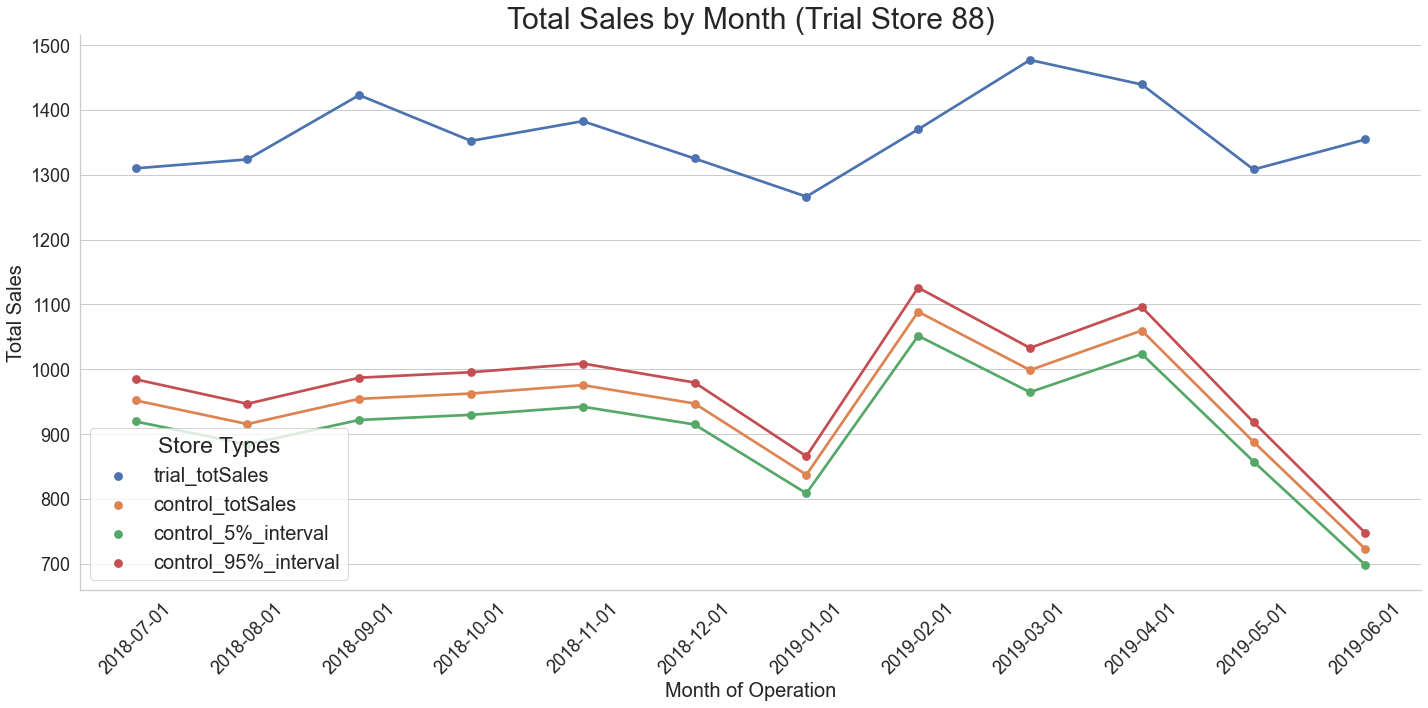

In [558]:
# plot
sns.set(style="whitegrid")

# plot
g = sns.catplot(x="transaction_month", 
                y="vals", 
                hue='cols', 
                data=melted_df, 
                kind='point', 
                height=10, 
                aspect=20/10,
                legend=False)


# set x labels orientation
plt.xticks(rotation=45)

# # set fontsize
plt.xlabel("Month of Operation", fontsize= 20)
plt.ylabel("Total Sales", fontsize=20)
plt.title("Total Sales by Month (Trial Store 88)", fontsize=30)
plt.tick_params(labelsize=18)



plt.legend(title = "Store Types",
          loc='best',
          fontsize=20,
          title_fontsize=23)

plt.tight_layout()

trial store 86 is not significantly different to its control store in the trial period. This relationship was shown in the graph where the trial store's performance lie within the confidence interval of the control store in two of the three trial months (trial months: from 2019-02 to 2019-06)

This time make a graph looking at the number of customers 

In [504]:
measureOverTimeSales.head()

,STORE_NBR,yearmonth,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,transaction_month
0,1,201807,206.9,49,1.061224,1.192308,3.337097,2018-07-01
1,1,201808,176.1,42,1.023810,1.255814,3.261111,2018-08-01
2,1,201809,278.8,59,1.050847,1.209677,3.717333,2018-09-01
3,1,201810,188.1,44,1.022727,1.288889,3.243103,2018-10-01
4,1,201811,192.6,46,1.021739,1.212766,3.378947,2018-11-01


In [505]:
# trial and control store nCustomers
trial_nCustomers = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == trial_store, \
                                           ['transaction_month', 'nCustomers']].reset_index(drop=True)
control_nCustomers = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == ctrl_store, \
                                             ['transaction_month', 'nCustomers']].reset_index(drop=True)

In [506]:
display(trial_nCustomers.head())
display(control_nCustomers.head())

,transaction_month,nCustomers
0,2018-07-01,129
1,2018-08-01,131
2,2018-09-01,124
3,2018-10-01,123
4,2018-11-01,130


,transaction_month,nCustomers
0,2018-07-01,107
1,2018-08-01,108
2,2018-09-01,101
3,2018-10-01,102
4,2018-11-01,111


In [507]:
# rename columns for trial and control data
trial_nCustomers.columns = ['transaction_month', 'trial_nCustomers']
control_nCustomers.columns = ['transaction_month', 'control_nCustomers']

In [508]:
# merge the two dataframes
combineCustomers_df = pd.merge(trial_nCustomers, control_nCustomers, how='inner')
combineCustomers_df

,transaction_month,trial_nCustomers,control_nCustomers
0,2018-07-01,129,107
1,2018-08-01,131,108
2,2018-09-01,124,101
3,2018-10-01,123,102
4,2018-11-01,130,111
5,2018-12-01,126,101
6,2019-01-01,117,95
7,2019-02-01,124,107
8,2019-03-01,134,114
9,2019-04-01,128,117


In [509]:
# create two columns marking the 95% and 5% confidence interval and graph later
combineCustomers_df['control_5%_interval'] = combineCustomers_df['control_nCustomers'] * (1-stdDev*2)

combineCustomers_df['control_95%_interval'] = combineCustomers_df['control_nCustomers'] * (1+stdDev*2)

In [510]:
combineCustomers_df.head()

,transaction_month,trial_nCustomers,control_nCustomers,control_5%_interval,control_95%_interval
0,2018-07-01,129,107,103.346153,110.653847
1,2018-08-01,131,108,104.312005,111.687995
2,2018-09-01,124,101,97.551042,104.448958
3,2018-10-01,123,102,98.516893,105.483107
4,2018-11-01,130,111,107.209560,114.790440


In [511]:
# melt combineCustomers_df for graphing
melted_customer_df = combineCustomers_df.melt('transaction_month',var_name='cols',value_name='vals')

# convert transaction month to string datatype so xticks won't display time in seconds
melted_customer_df['transaction_month'] = melted_customer_df['transaction_month'].astype("str")

In [512]:
display(melted_customer_df.head())
display(melted_customer_df.tail())

,transaction_month,cols,vals
0,2018-07-01,trial_nCustomers,129.0
1,2018-08-01,trial_nCustomers,131.0
2,2018-09-01,trial_nCustomers,124.0
3,2018-10-01,trial_nCustomers,123.0
4,2018-11-01,trial_nCustomers,130.0


,transaction_month,cols,vals
43,2019-02-01,control_95%_interval,110.653847
44,2019-03-01,control_95%_interval,117.892884
45,2019-04-01,control_95%_interval,120.995328
46,2019-05-01,control_95%_interval,105.483107
47,2019-06-01,control_95%_interval,95.141626


In [513]:
trial_store

88

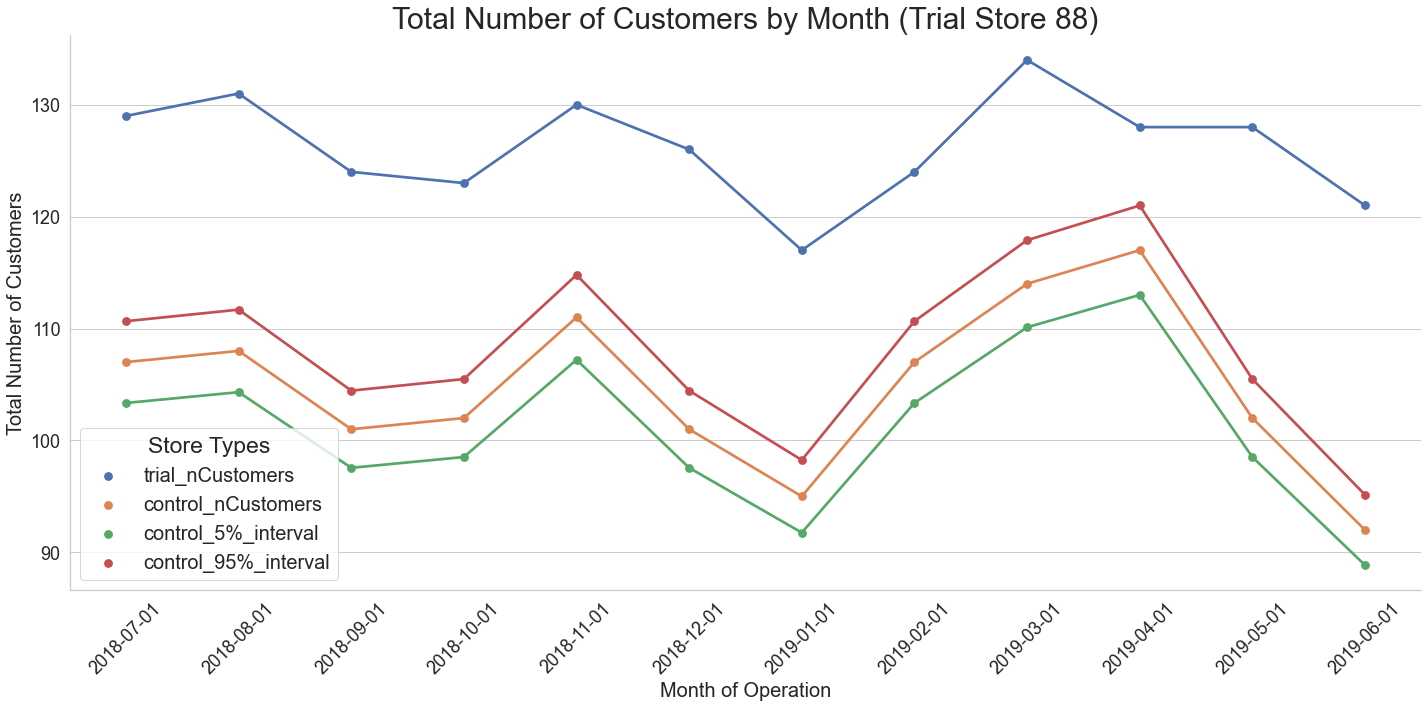

In [515]:
sns.set(style='whitegrid')

ax = sns.catplot(x = 'transaction_month',
                y = 'vals',
                hue = 'cols',
                data = melted_customer_df,
                kind = 'point',
                height = 10,
                aspect = 20/10,
                legend = False)

# set x labels orientation for visability
plt.xticks(rotation=45)

# set font sizes and labels
plt.xlabel("Month of Operation", fontsize = 20)
plt.ylabel("Total Number of Customers", fontsize = 20)
plt.title("Total Number of Customers by Month (Trial Store 88)",fontsize=30)
plt.tick_params(labelsize=18)

# set legend
plt.legend(title = 'Store Types',
          loc = 'best',
          fontsize=20,
          title_fontsize=23)

plt.tight_layout()